In [95]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns 

%config InlineBackend.figure_format = 'retina' 
#한글설정 #rc는 plt 기본 속성들을 설정하는 함수
plt.rc('font',family='Malgun Gothic') #윈도우즈
plt.rc('axes', unicode_minus=False) #축설정 (축의 - 깨짐 방지)
# # plt.rc('font',family='AppleGothic') #Mac
# plt.rcParams['font.family'] = 'Malgun Gothic' #위의 것과 동일함 

#warning(경고) 안보이게



<span style="color:red; font-size: 35px; font-weight: bold;"> 데이터 시각화 </span></br>
- 시각화 라이브러리 : matplotlib(데이터시각화), seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
    * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby기능이 포함된 라이브러리
    

# 2절. seaborn
    - 공식 사이트 : https://seaborn.pydata.org
    - seaborn API : https://seaborn.pydata.org/api.html

- seaborn으로 그래프 그리기 위해 다음 단계를 따릅니다.
    1. 데이터 준비
    2. 미적 속성 설정 (한글설정을 다시 해야 함)
    3. 함수를 이용하여 그래프 그리기(x축 기준으로 수치형(관계형 그래프)(scatterplot/lineplot),범주형(stripplot/swarmplot), 쌍관계, 밀도, 회귀, 다중 그래프)
    4. 그래프출력(show), 저장(savefig)

In [5]:
sns.__version__ #버전확인

'0.12.2'

## 2.1 데이터 준비하기
- iris, titanic

In [7]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
iris.species.unique() #범주형 데이터들의 종류를 확인

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
iris.species.value_counts() #범주별 데이터 갯수 (groupby도 가능하나 이렇게 하는거 추천)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [17]:
iris.groupby('species')['sepal_length'].count() #결측치가 있을 수 있어서 쓰기 위험 /
#groupby는 결측치 제외하고 보여짐

species
setosa        50
versicolor    50
virginica     50
Name: sepal_length, dtype: int64

In [ ]:
# Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)
# Name - 탑승객 성명
# Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
# Sex - 성별
# Age - 나이(세)
# SibSp - 함께 탑승한 형제자매, 배우자 수 총합
# Parch - 함께 탑승한 부모, 자녀 수 총합
# Embarked - 탑승 항구
# Fare - 탑승 요금
# Ticket - 티켓 넘버
# Cabin - 객실 넘버
# Boat : 탈출한 보트가 있다면 boat 번호
# Embarked : 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [27]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
titanic.shape

(891, 15)

In [21]:
titanic.survived.sum()

342

In [30]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2.2 미적속성 설정하기 (style, context,palette,figsize)
- 한번 설정하고 다시 설정하지 않으면 같은 설정값으로 지속 사용 가능

### 1) 그래프 style 설정
- https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style (교안 51page)
- 범례 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot (교안 20page)

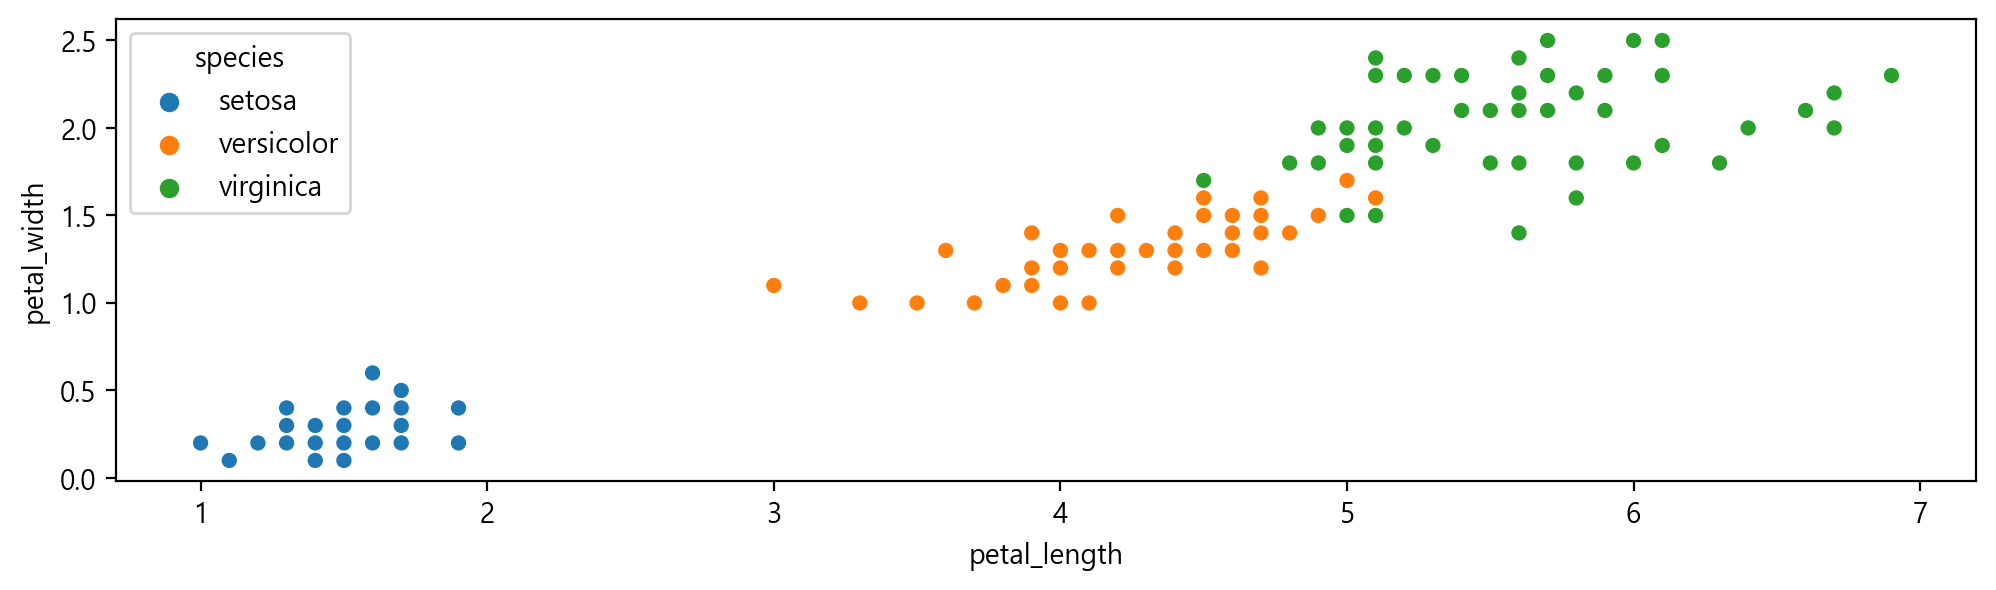

In [33]:
plt.figure(figsize=(12,3))
# sns.set(style='')
sns.scatterplot(data=iris, x='petal_length', y='petal_width',hue='species') #수치형 그래프
plt.show()

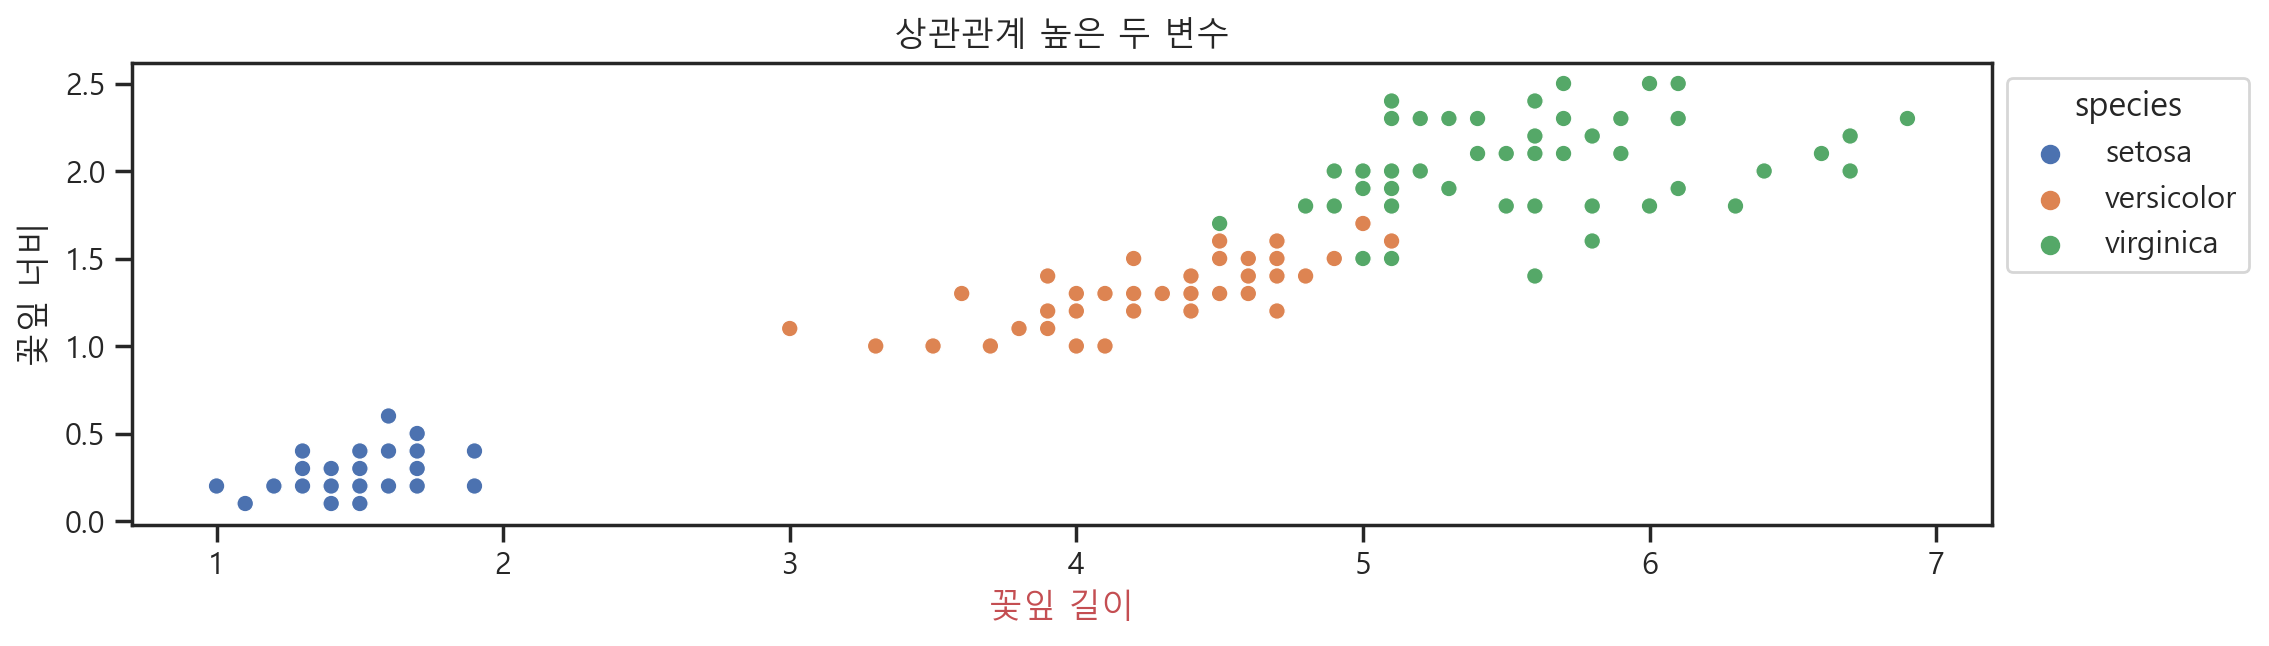

In [56]:
plt.figure(figsize=(12,3))
sns.set(style='ticks') #white, whitegrid, dark, darkgrid,ticks
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width',hue='species') #수치형 그래프
ax.set(title='상관관계 높은 두 변수',
      ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', color='r')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

범례  https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot (교안 20page)

### 2) context 지정(비율)

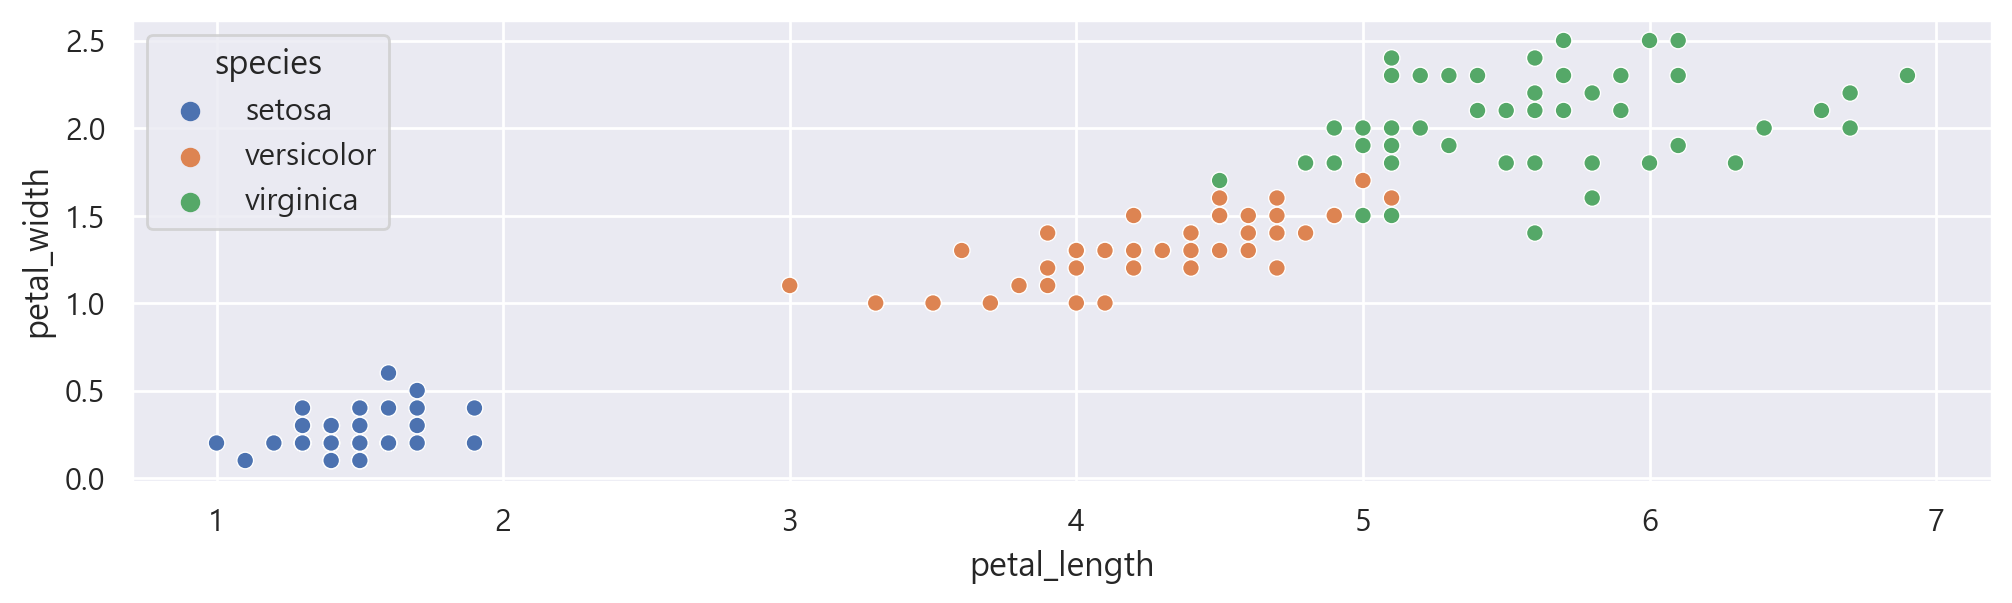

In [59]:
plt.figure(figsize=(12,3))
sns.set(context='notebook') #notebook(1.0), paper(0.8), talk(1.3), poster(1.8)

plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

sns.scatterplot(data=iris, x='petal_length', y='petal_width',hue='species')
plt.show()

### 3) 컬러팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html


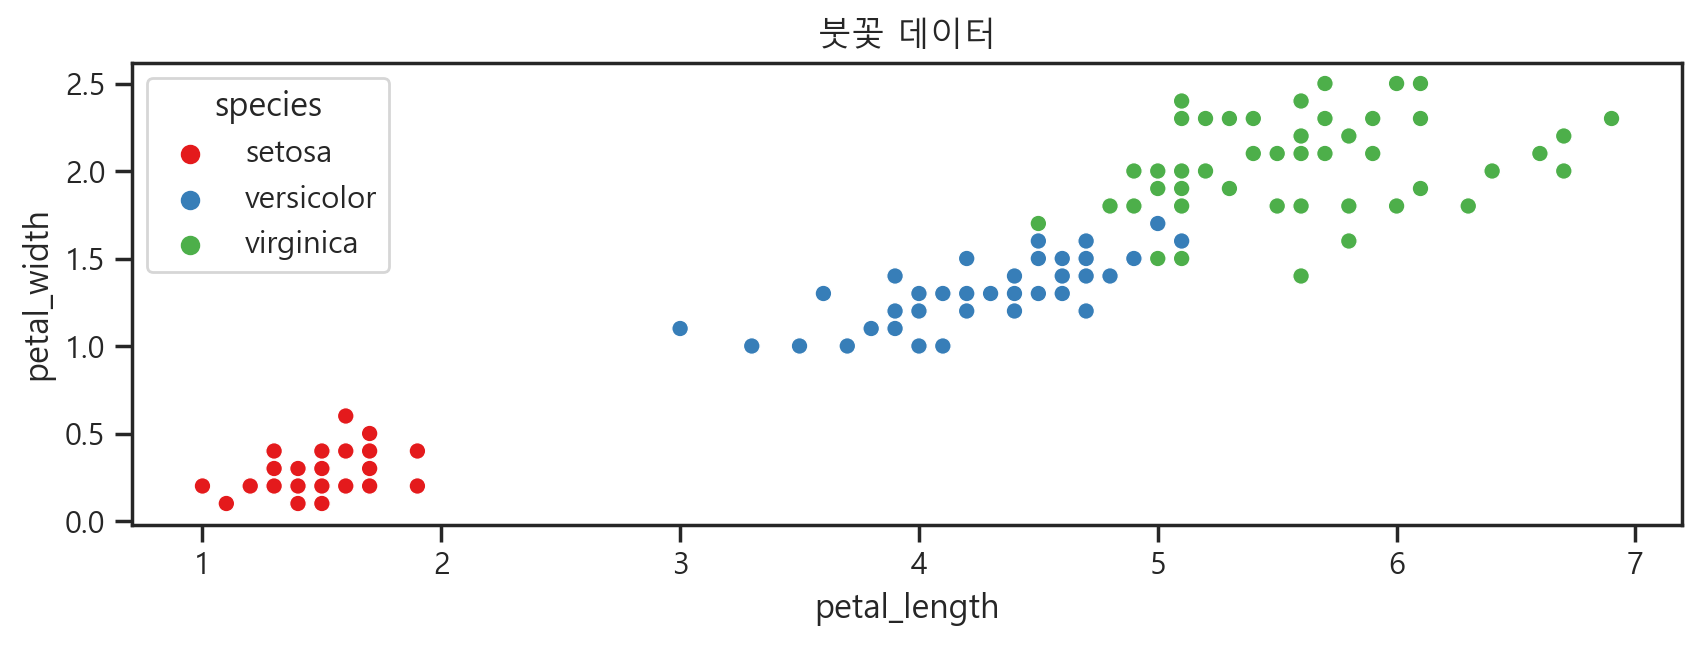

In [71]:
sns.set(palette='Set1', 
        style='ticks', 
        context='notebook',
        rc={'figure.figsize':(10,3)}) #기본 미적 속성은 Pastel1
plt.rc('font',family='Malgun Gothic') #윈도우즈  
plt.rc('axes', unicode_minus=False)   # 축의 -깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width',
               hue='species', palette='Set1')
ax.set_title('붓꽃 데이터')
plt.show()

## 2.3 Seaborn함수로 그래프 그리기
### 1)관계형 그래프
- <font color='red'>**x축이 수치형 데이터**</font> \
    ex) scatterplot,lineplot => relplot(서브 플롯)

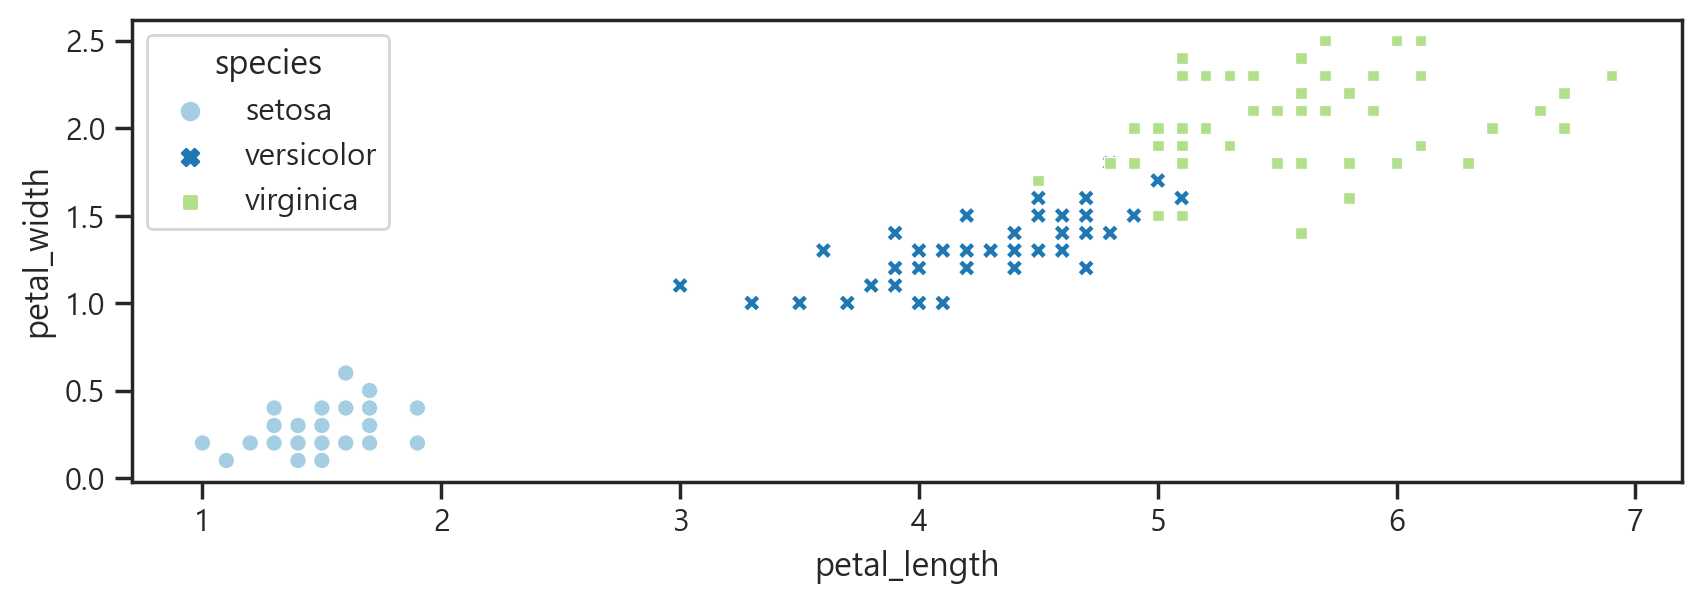

In [74]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', #hue의 열 기준으로 따로따로 그림그림
                palette='Paired', style='species')
#species별 색상과 스타일이 다른 scatterplot (hue로 species를 지정했기 때문에)
plt.show()

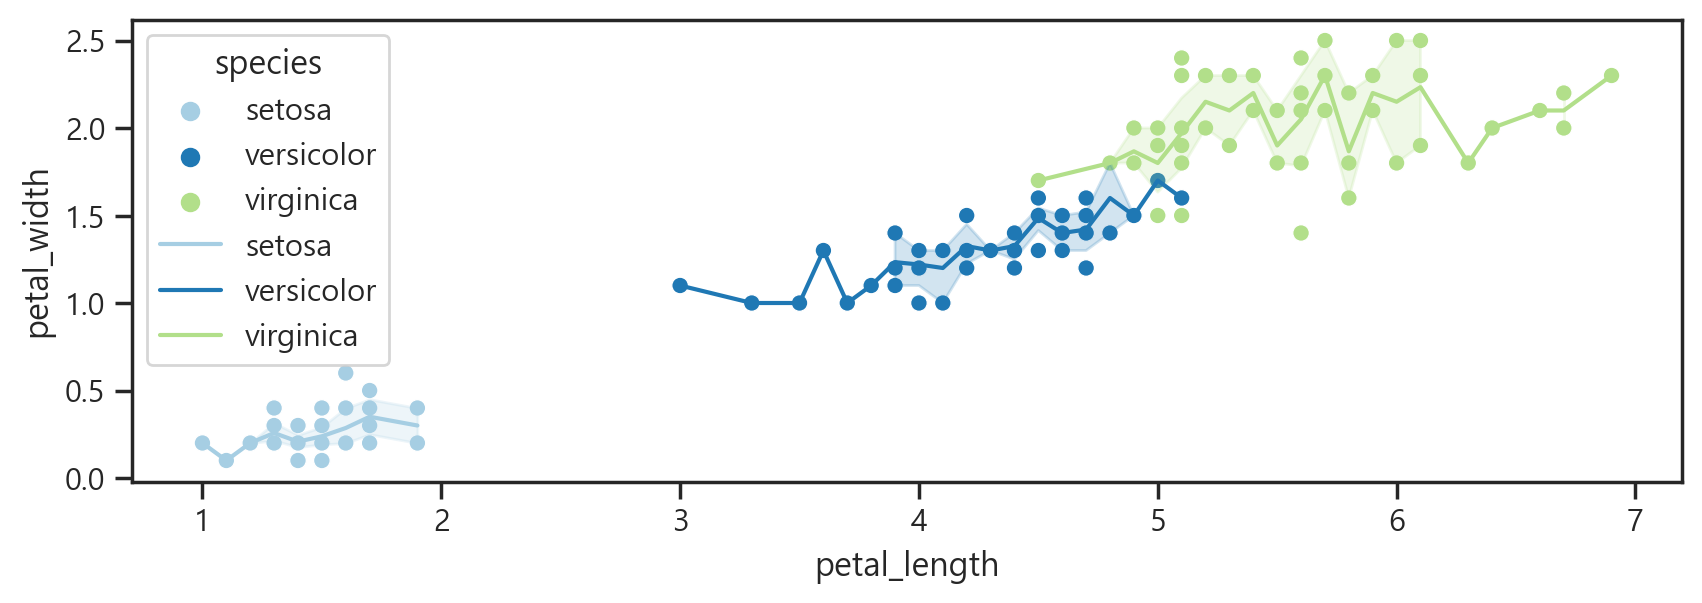

In [98]:
# scatter와 line을 겹쳐서 
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', #hue의 열 기준으로 따로따로 그림그림
                palette='Paired')
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', 
                palette='Paired')
plt.show()

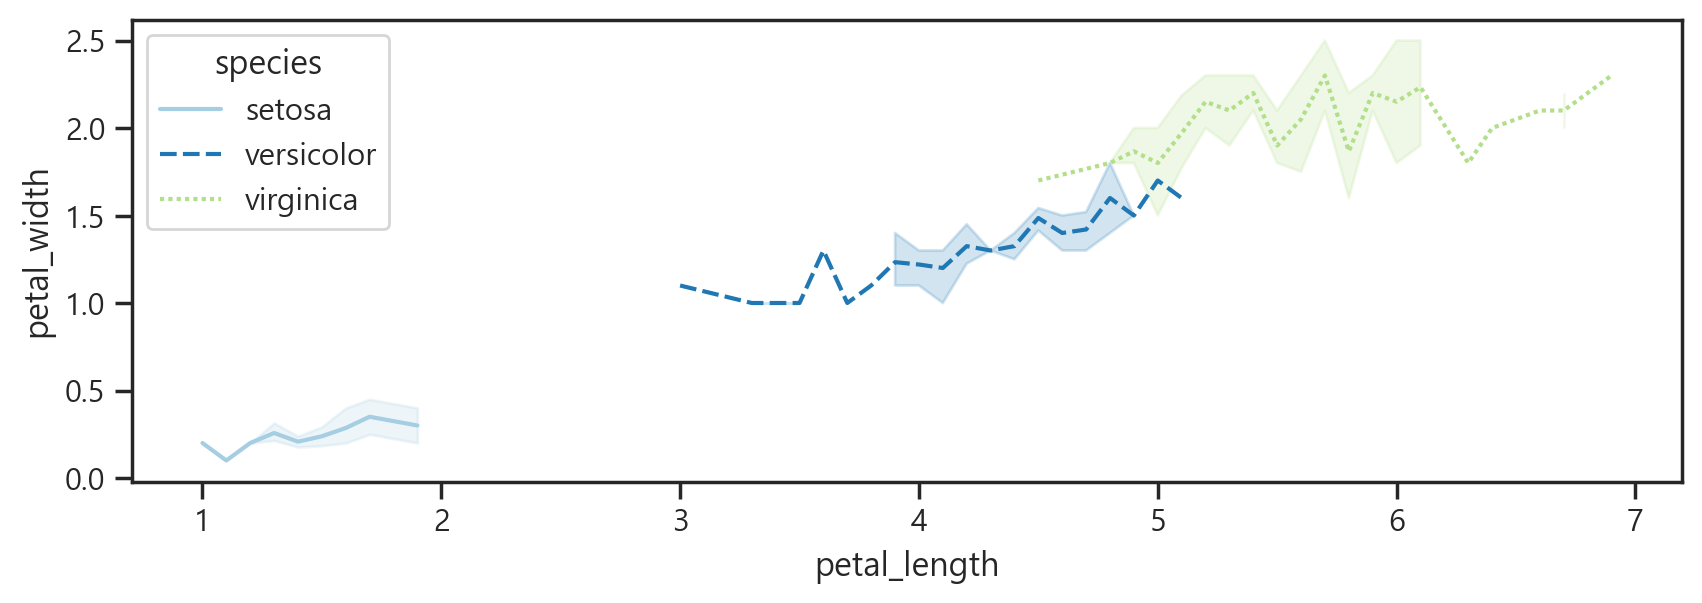

In [79]:
#종별 lineplot을 한 그래프에 그리기
#lineplot의 음영 : 95%신뢰 구간

sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', 
                palette='Paired', style='species')
plt.show()

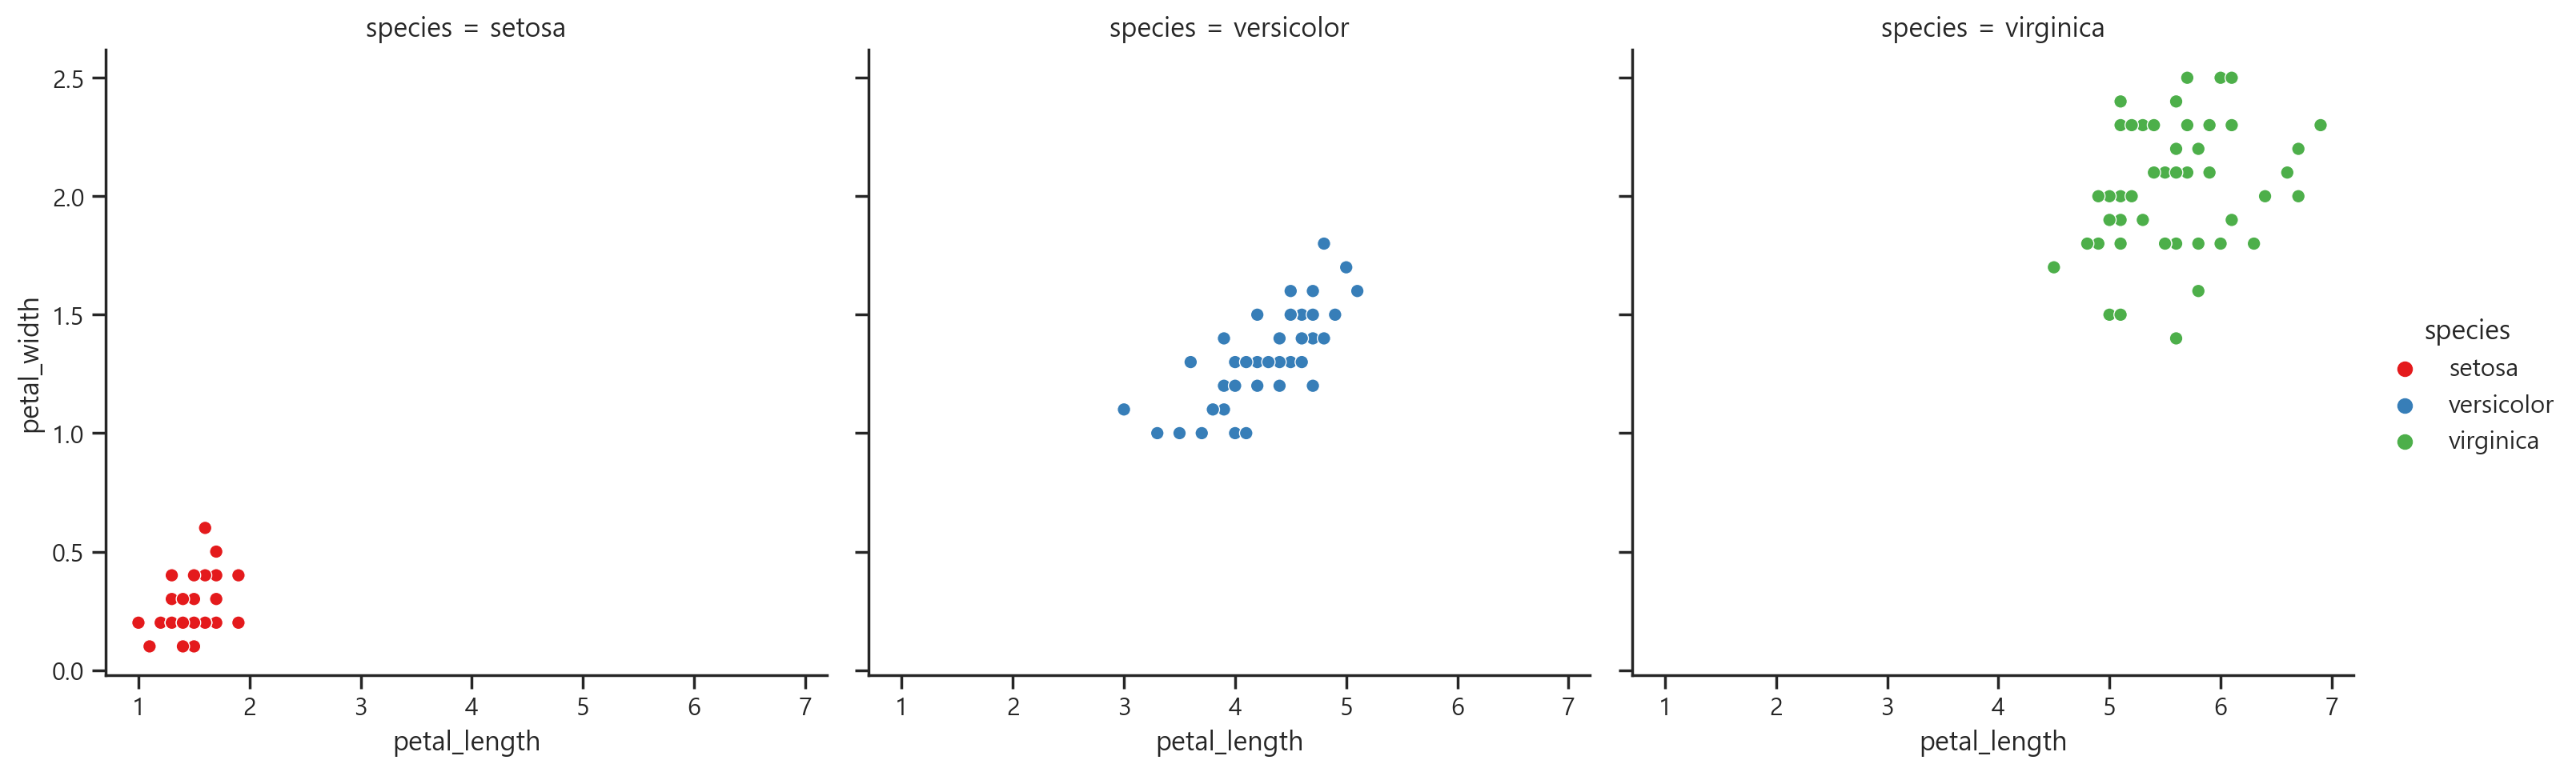

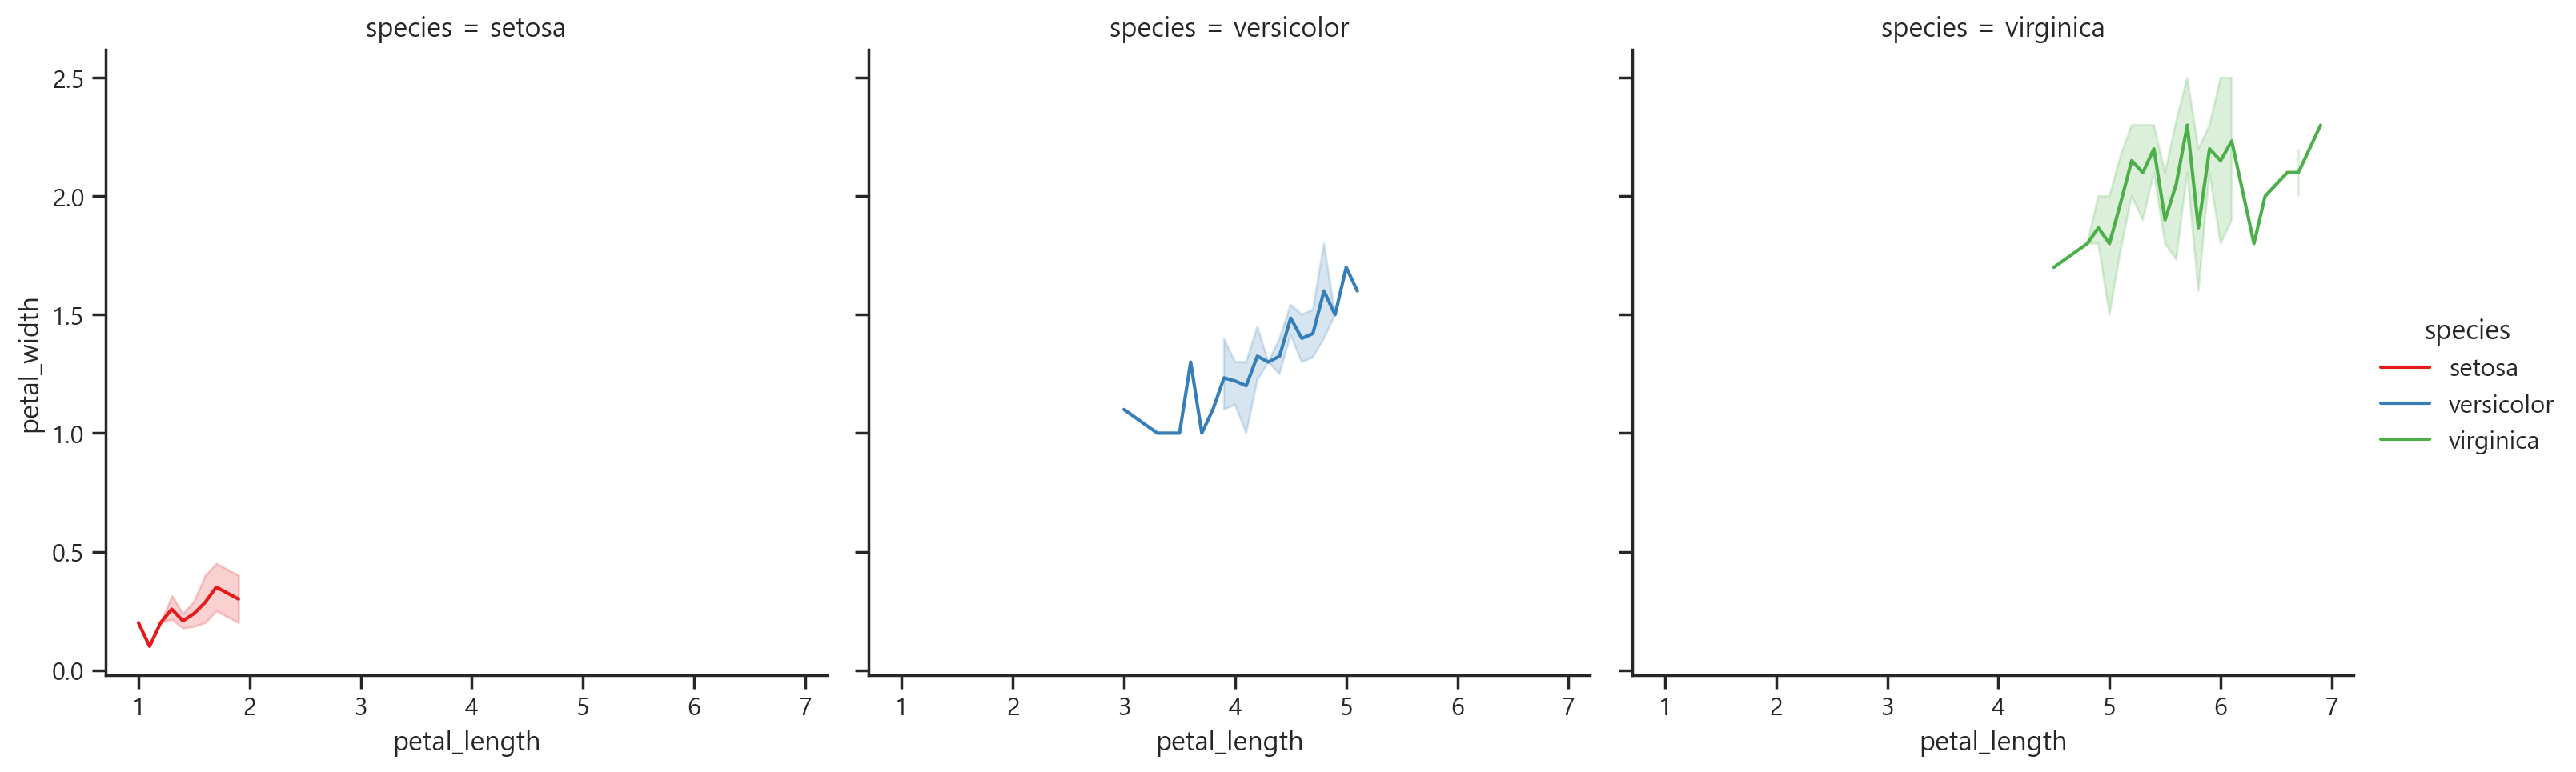

In [210]:
#한줄로 나타냄 / 서브플롯 함수들은 데이터가 한 그래프에 겹쳐서 그려지진 않음. 
#종별 lineplot을 서브플롯으로 그리기 
sns.relplot(data=iris, x='petal_length', y='petal_width',
           hue='species',
#            kind='line',  #kind의 기본값은 scatter
           col='species',  #species별 서브프롯
#             col_wrap=2,    #한줄에 표현될 서브플롯 수
           )
sns.relplot(data=iris, x='petal_length', y='petal_width',
           hue='species',
            kind='line',  #kind의 기본값은 scatter
           col='species',  #species별 서브프롯
#             col_wrap=2,    #한줄에 표현될 서브플롯 수
           )
plt.show()

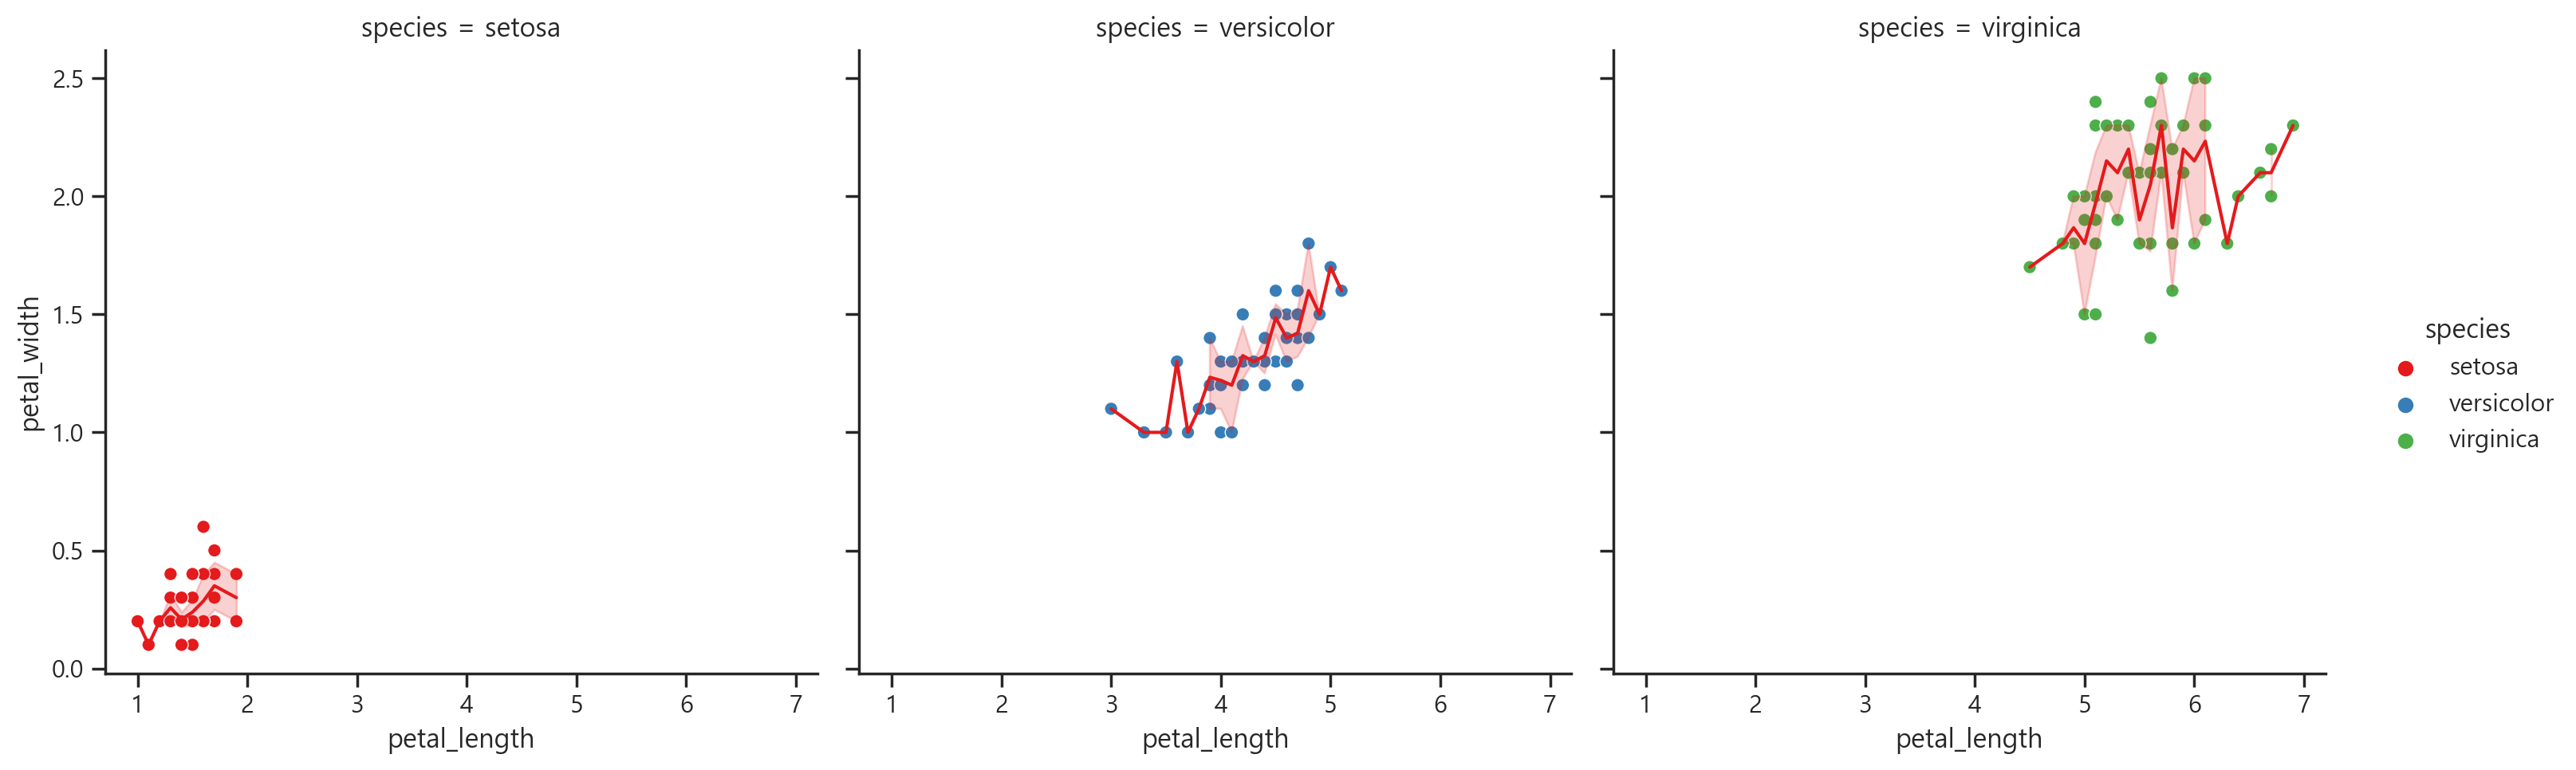

In [209]:
# leneplot과 scatterplot을 서브플롯으로 겹쳐서 종별로 그리기
g = sns.relplot(data=iris, x='petal_length', y='petal_width',
           hue='species',
#            kind='line',  #kind의 기본값은 scatter
           col='species',  #species별 서브프롯
#             col_wrap=2,    #한줄에 표현될 서브플롯 수
           )

# g그래프에 lineplot 추가 
g.map_dataframe(sns.lineplot, x='petal_length', y='petal_width')
plt.show()
#크기 조정 : 서브 플로함수에서는 내부적으로 figure 새로 만들기 때문에 figsize 무시
g.fig.set_size_inches(10,3)

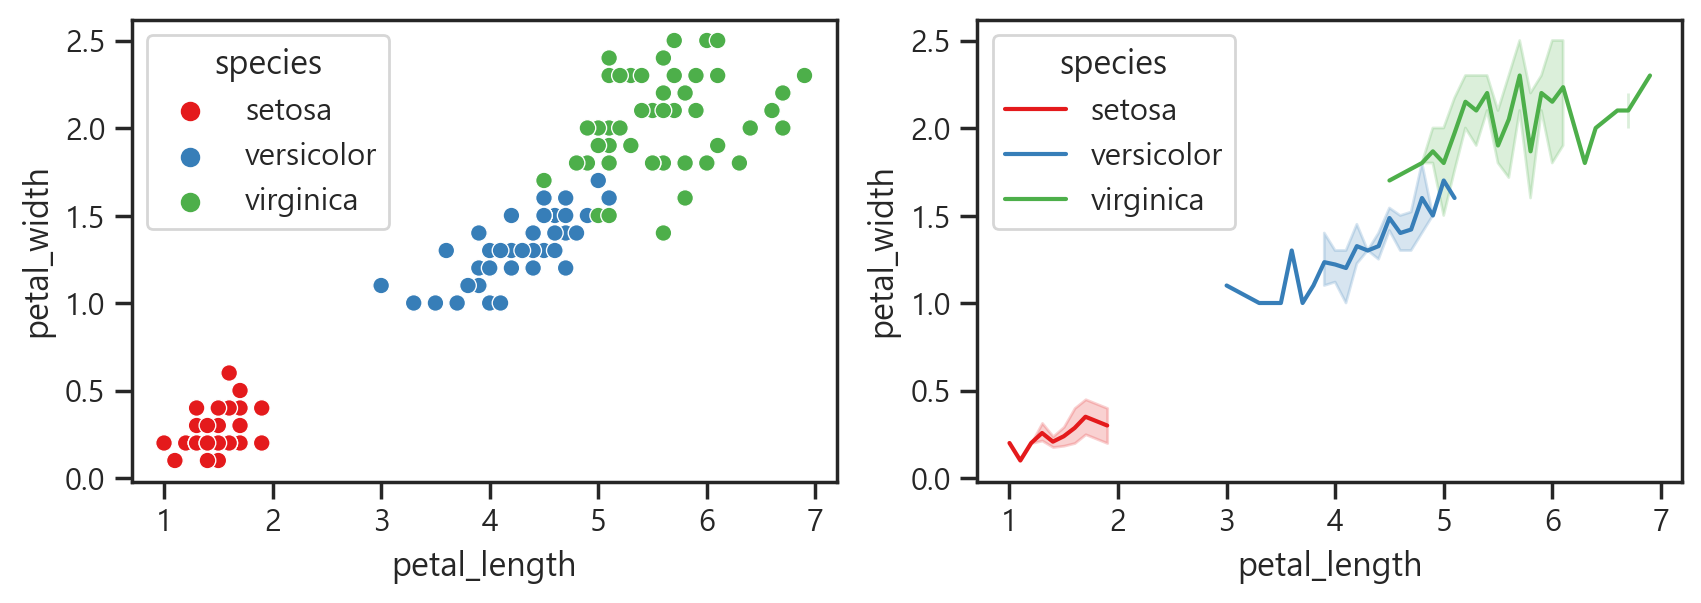

In [151]:
# ax[0]에는 scatter, ax[1] lineplot
fig, ax = plt.subplots(1, ncols=2)
sns.scatterplot(data=iris, 
                x='petal_length', 
                y='petal_width', 
                hue='species', 
                ax=ax[0])
sns.lineplot(data=iris, 
            x='petal_length', 
            y='petal_width', 
            hue='species',
            ax=ax[1])
plt.show()

### 2)범주형 그래프
- <font color='red'>**x축이 범주형 데이터**</font> \
    ex) stripplot(무작위 흩뿌림) , swarmplot(겹치지 않는 산점도) \
    barplot, barhplot(y의 평균으로 막대그래프), pointplot(y의 평균으로 line),\
    countplot(count는 x의 빈도수가 높이/ y를 지정할 수 없음), \
    boxplot, violinplot, boxenplot \
    => catplot(서브플롯)

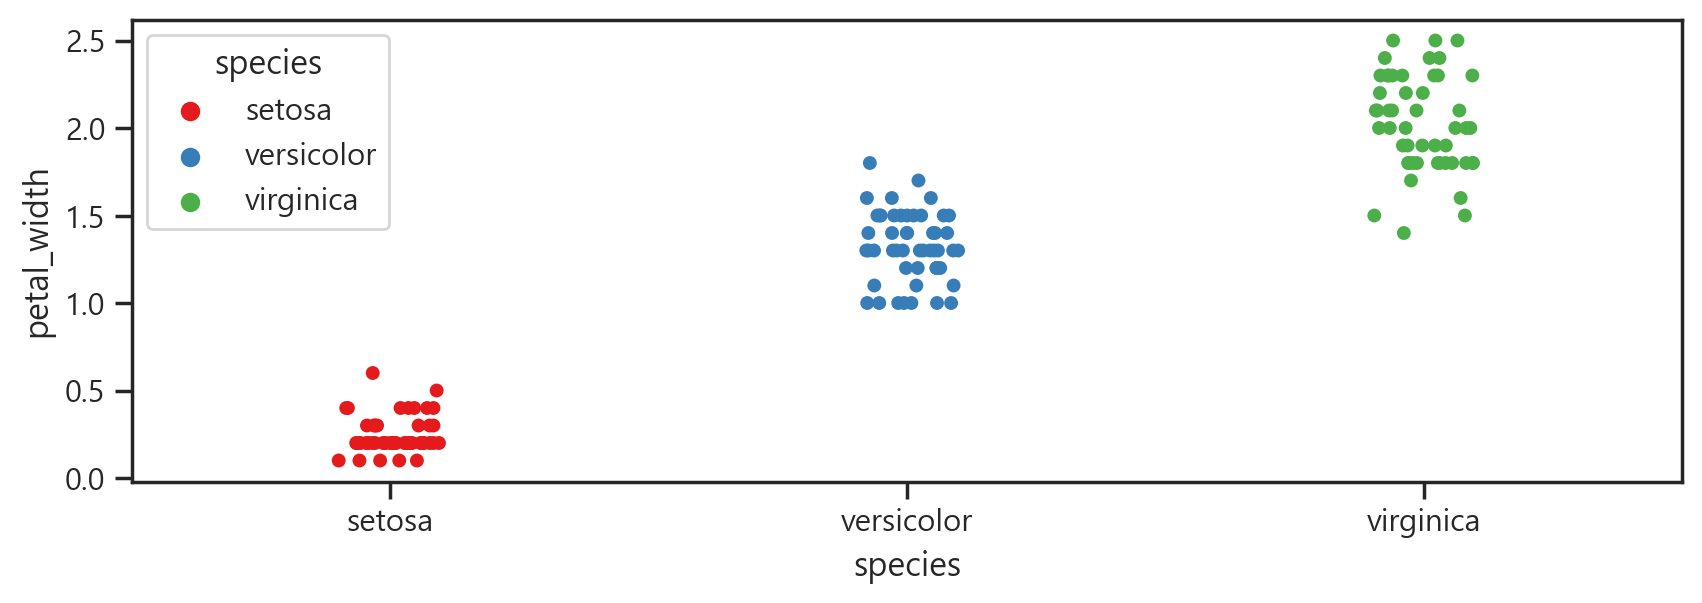

In [107]:
# x축이 범주형일 때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width', hue='species')
plt.show() 

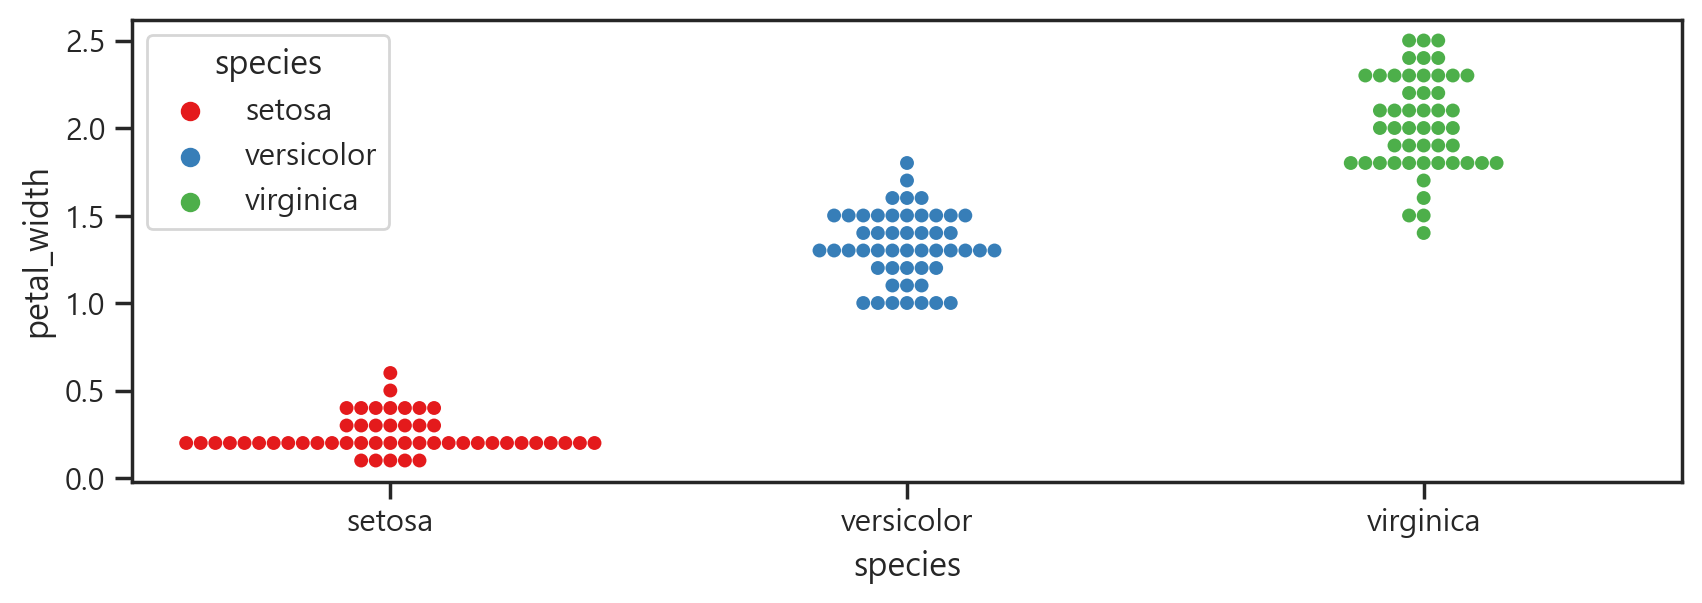

In [108]:
# x축이 범주형일 때의 산점도
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

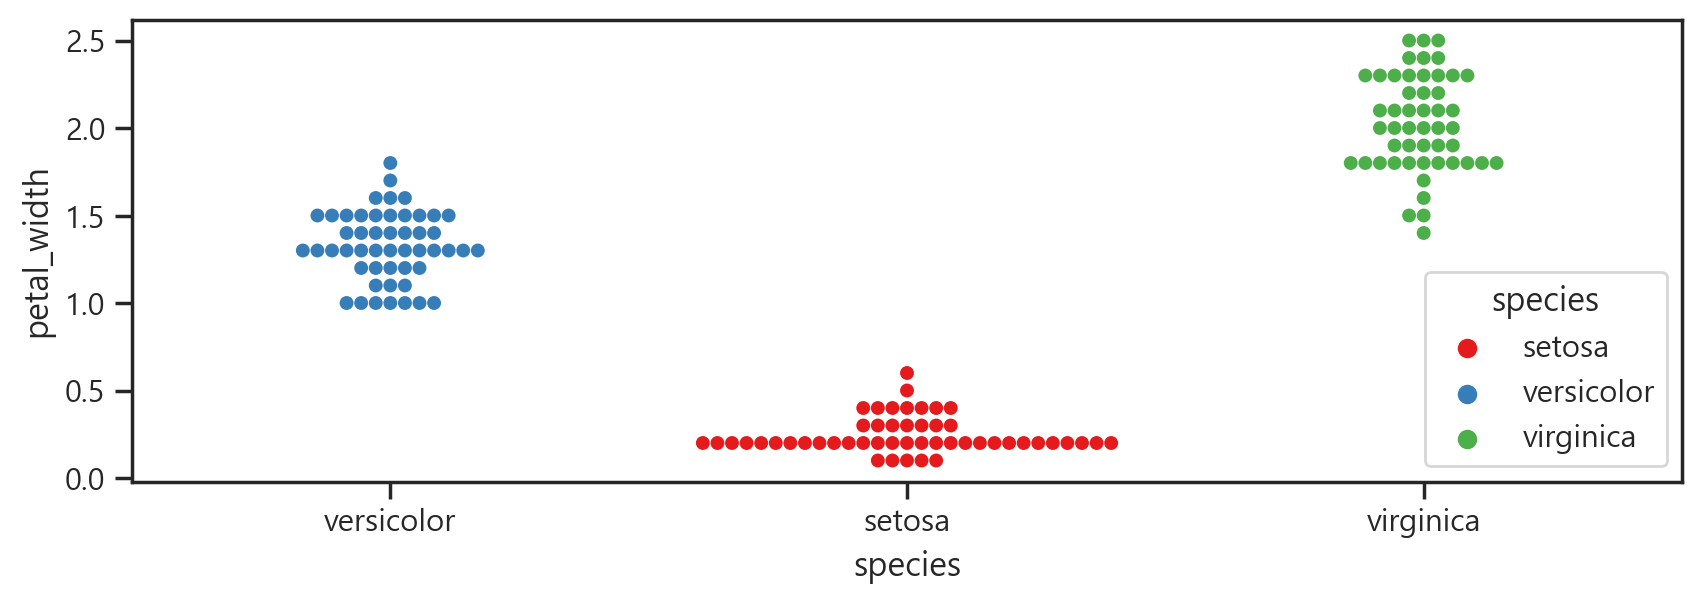

In [112]:
# 범주형 그래프의 x축을 지정하지 않으면 알아서 지정함  
sns.swarmplot(data=iris,
             x='species',
             y='petal_width',
             hue='species',
             order=['versicolor','setosa','virginica'])
plt.show()

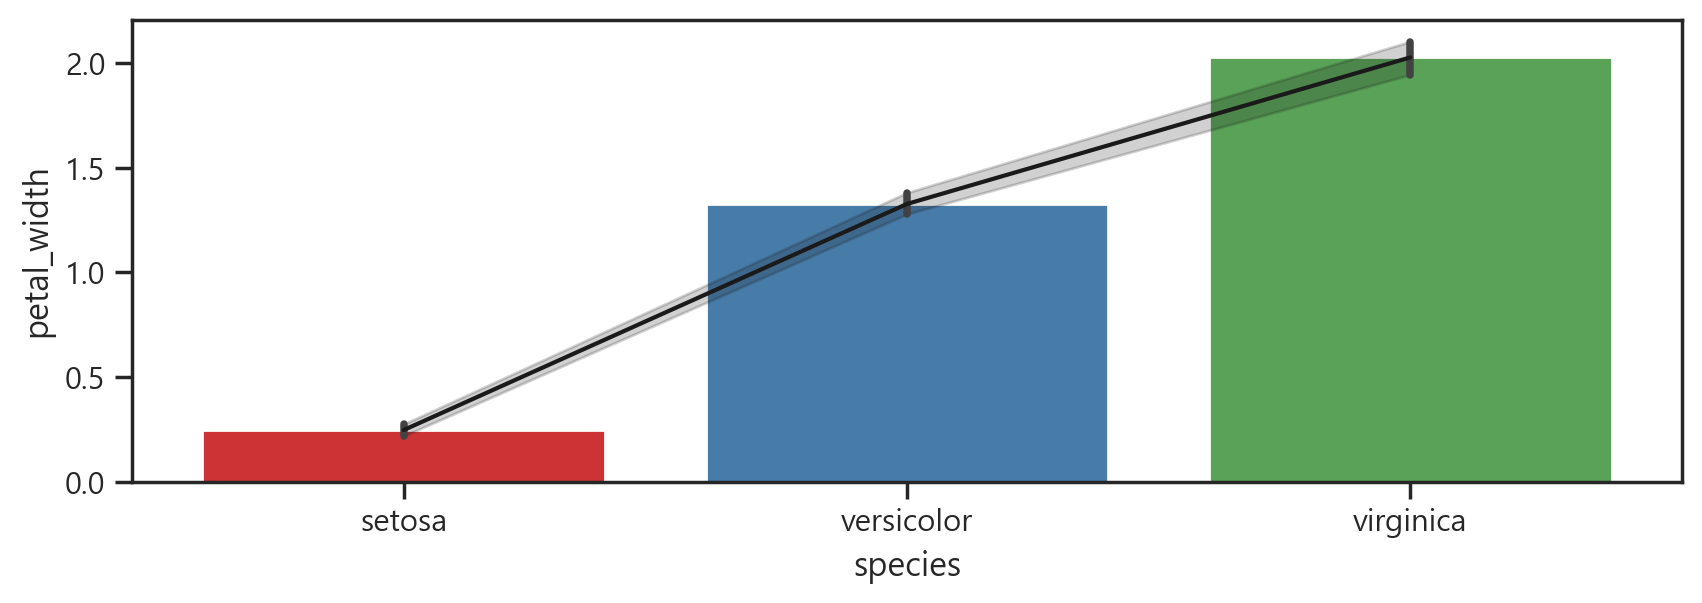

In [119]:
# barplot, barhplot, pointplot : 각 범주별 평균값(y)과 그에 대한 신뢰구간
sns.barplot(data=iris, x='species', y='petal_width')
sns.lineplot(data=iris,x='species', y='petal_width', color='k')
plt.show()

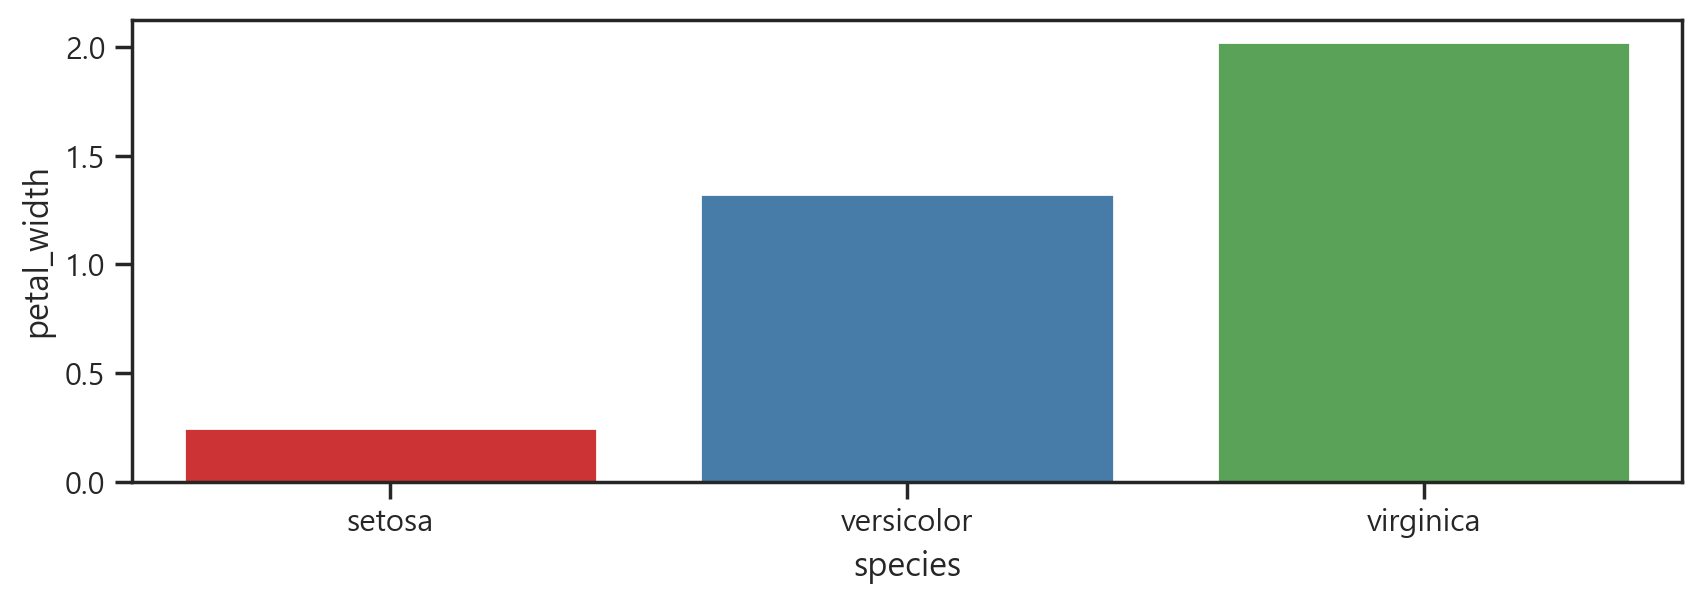

In [120]:
# barplot, barhplot, pointplot : 각 범주별 평균값(y)과 그에 대한 신뢰구간
sns.barplot(data=iris, x='species', y='petal_width',
           errorbar=None) #신뢰구간 제외 : errorbar=None
plt.show()

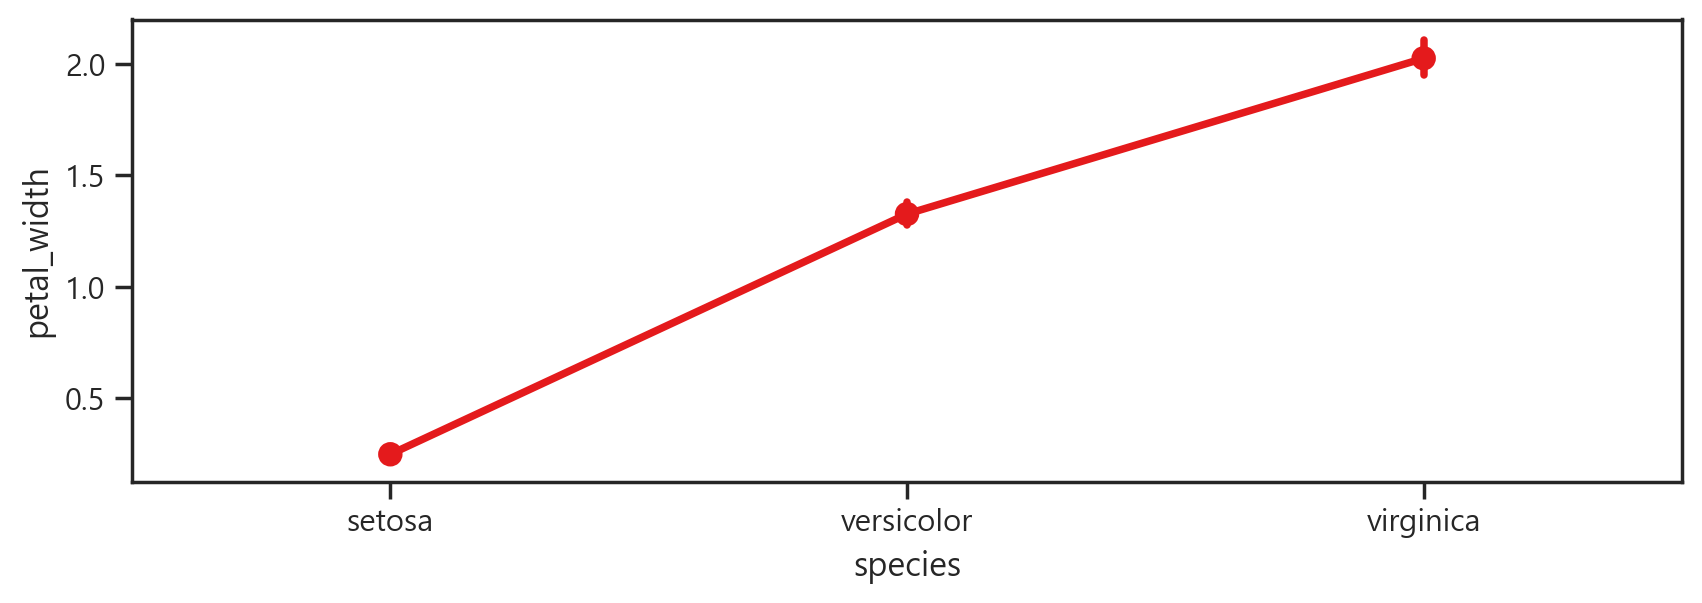

In [122]:
sns.pointplot(data=iris, x='species', y='petal_width') #신뢰구간을 제외
plt.show()

In [123]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [126]:
titanic.dtypes.head()

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
dtype: object

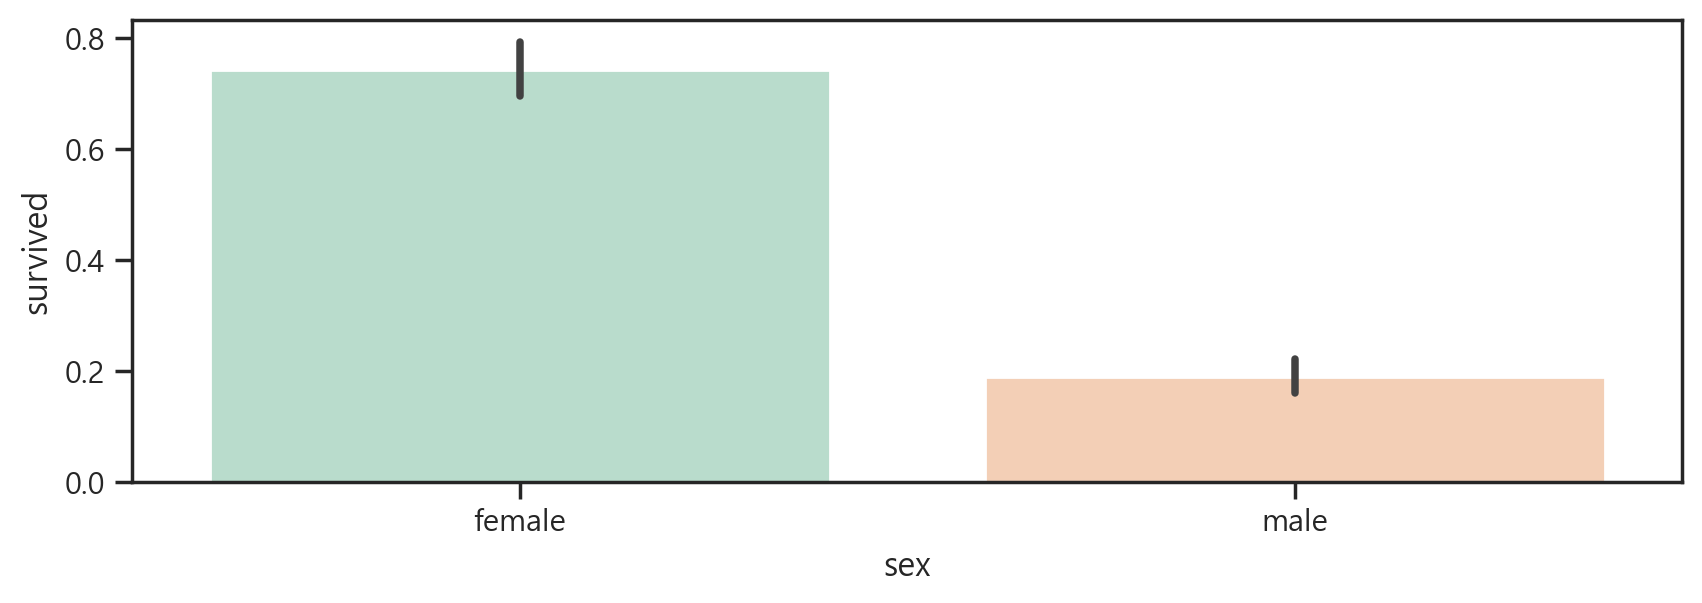

In [150]:
#성별, 생존율을 막대그래프로 담기
sns.barplot(data=titanic,
           x='sex',
           y='survived',
           order=['female','male'],
           palette='Pastel2')
plt.show()

In [138]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [145]:
#남자(577명)중 비생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==0)])

468

In [146]:
#남자(577명)중 생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==1)])

109

In [147]:
#여자(314명)중 비생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==0)])

81

In [148]:
#여자(314명)중 비생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==1)])

233

In [152]:
titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
327,1,2,female,36.0,0,0,13.00,S,Second,woman,False,D,Southampton,yes,True
301,1,3,male,NaN,2,0,23.25,Q,Third,man,True,NaN,Queenstown,yes,False


In [153]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

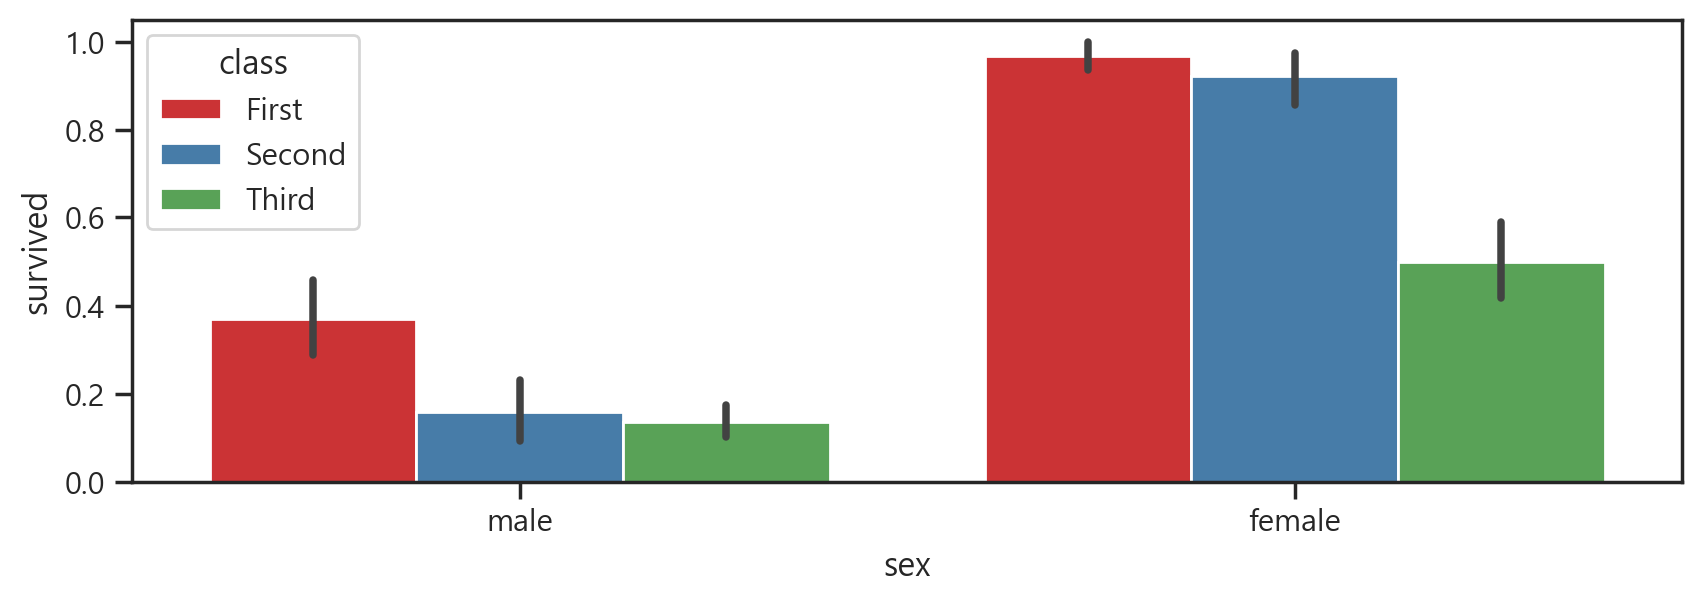

In [155]:
#성별 생존률   hue='class' #class기준 
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

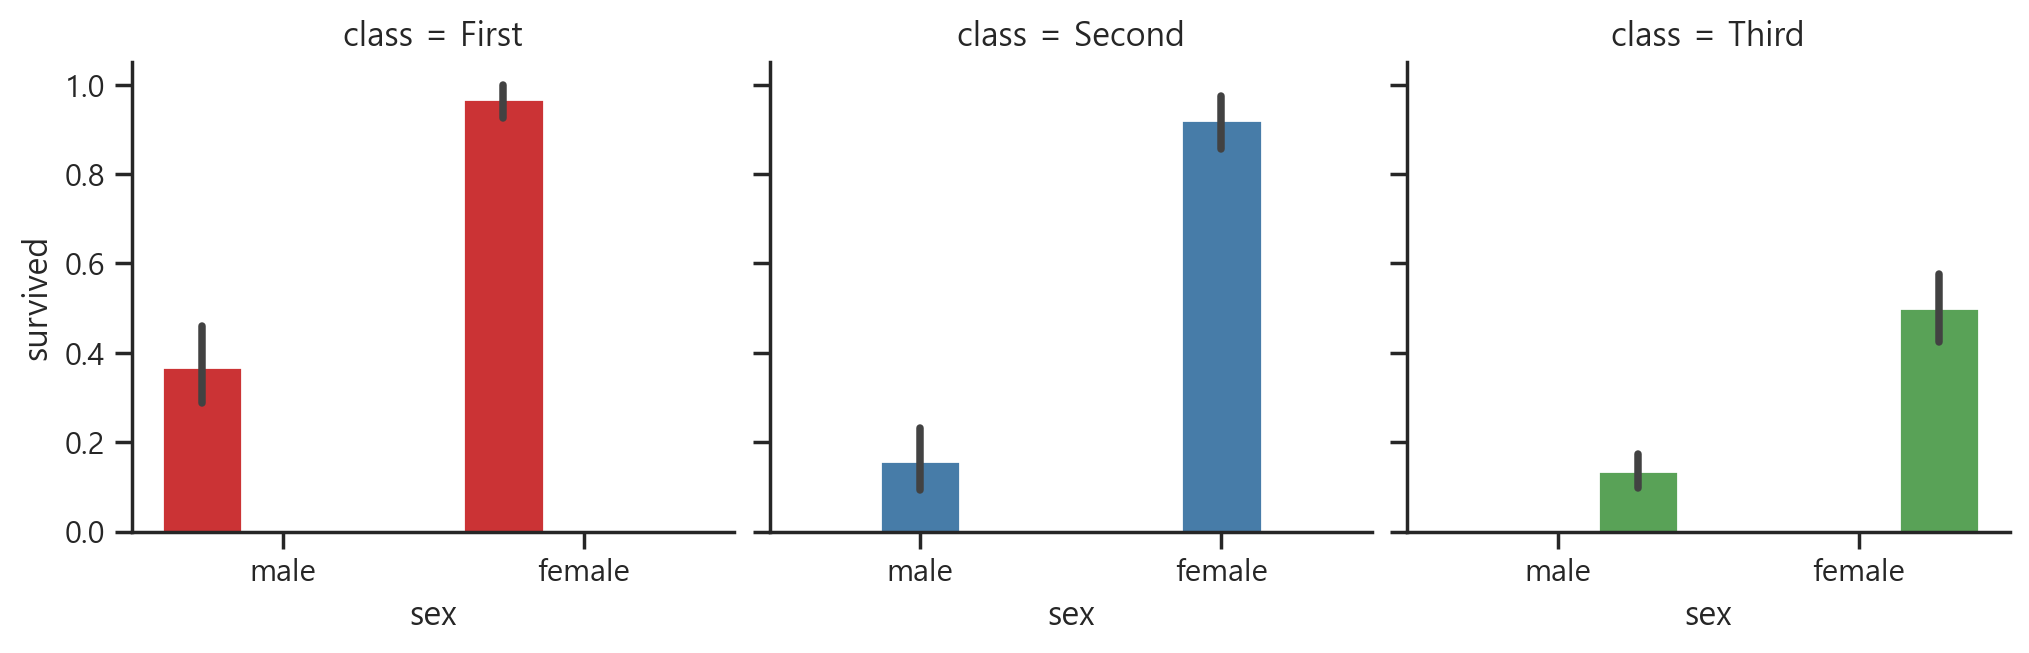

In [172]:
# class별로 성별생존률을 서브플롯(막대그래프)
g = sns.catplot(data=titanic,
           x='sex',
           y='survived',
           hue='class',
           kind='bar',  #kind를 안 쓰면 안됨. 기본값은 stripplot으로 설정되어있어서 막대그래프로 안 나옴 
           col='class',
#            col_wrap=2   #한행에 그려질 서브플롯 개수, 기본값은 n(class의 갯수)
           )
g.fig.set_size_inches(10,3)
plt.show()

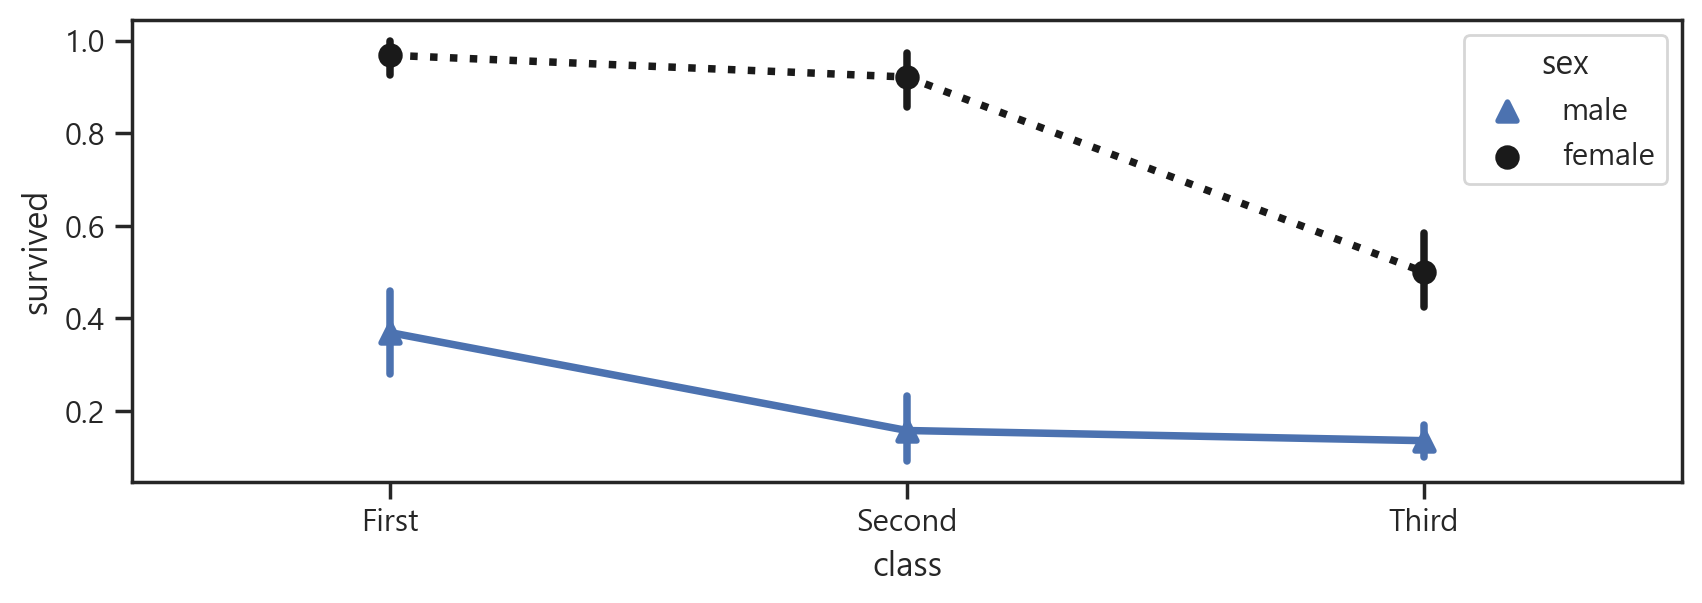

In [181]:
#성별 생존률   hue='class' #class기준 
sns.pointplot(data=titanic,
             x='class',
             y='survived',
             hue='sex',
             markers=['^','o'],
             linestyles=['-',':'],
             palette={'male':'b','female':'k'})
plt.show()

In [189]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [206]:
totallen = len(titanic)
nanlen = titanic.deck.isna().sum()
datalen = totallen - nanlen
print(' 전체 데이터 갯수 :{}, 결측치 갯수 :{}, 데이터갯수 :{}'.format(totallen,
                                                                   nanlen,
                                                                   datalen))

 전체 데이터 갯수 :891, 결측치 갯수 :688, 데이터갯수 :203


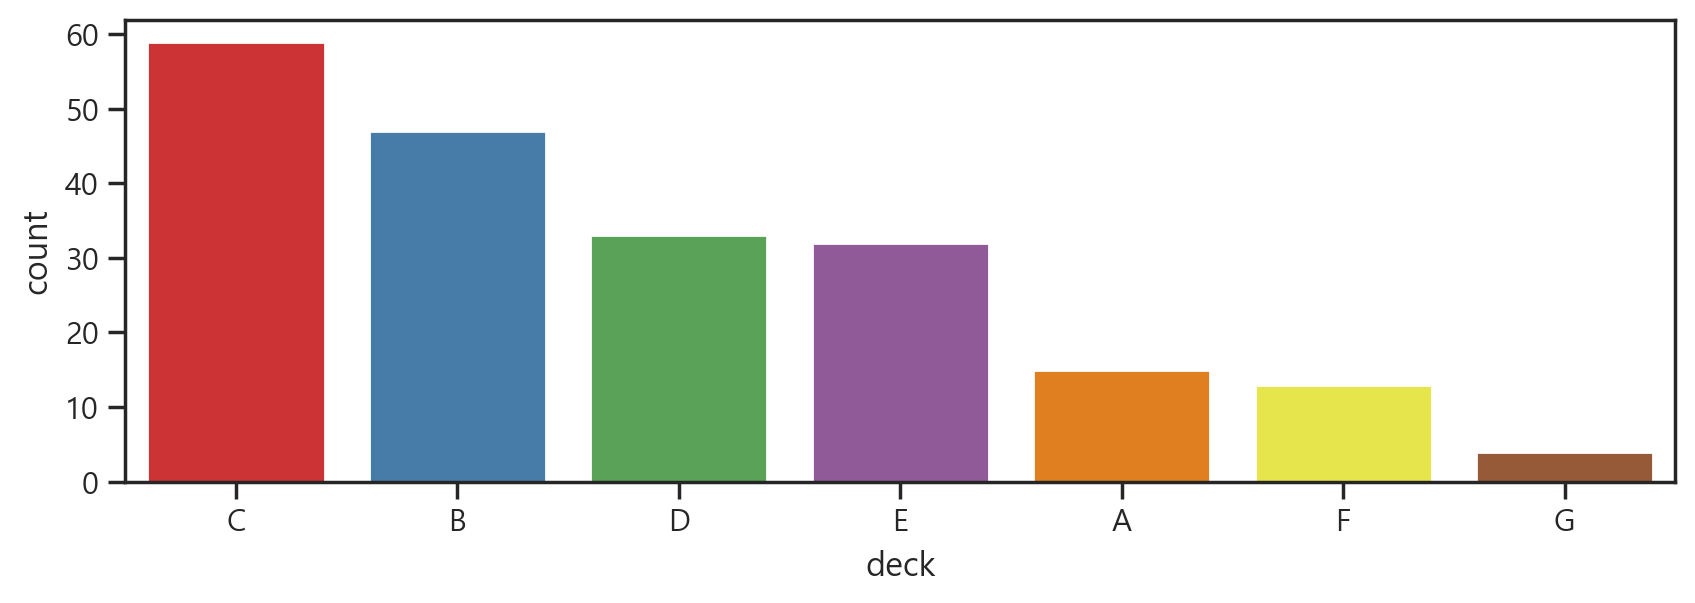

In [221]:
#deck 별 갯수를 막대그래프로(countplot)
sns.countplot(data=titanic,
                 x='deck',
                 order=deckcnt.index)
#                  order=['C','B','D','E','A','F','G']) 비추 
plt.show()

In [218]:
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [217]:
deckcnt = titanic.deck.value_counts() #범주별 데이터 갯수()
deckcnt.index #deckcnt.index가 count가 큰 순서

CategoricalIndex(['C', 'B', 'D', 'E', 'A', 'F', 'G'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False, dtype='category')

In [215]:
titanic.groupby('deck').count() #groupby는 정렬이 안 됨.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
deck,,,,,,,,,,,,,,
A,15,15,15,12,15,15,15,15,15,15,15,15,15,15
B,47,47,47,45,47,47,47,45,47,47,47,45,47,47
C,59,59,59,51,59,59,59,59,59,59,59,59,59,59
D,33,33,33,31,33,33,33,33,33,33,33,33,33,33
E,32,32,32,30,32,32,32,32,32,32,32,32,32,32
F,13,13,13,11,13,13,13,13,13,13,13,13,13,13
G,4,4,4,4,4,4,4,4,4,4,4,4,4,4


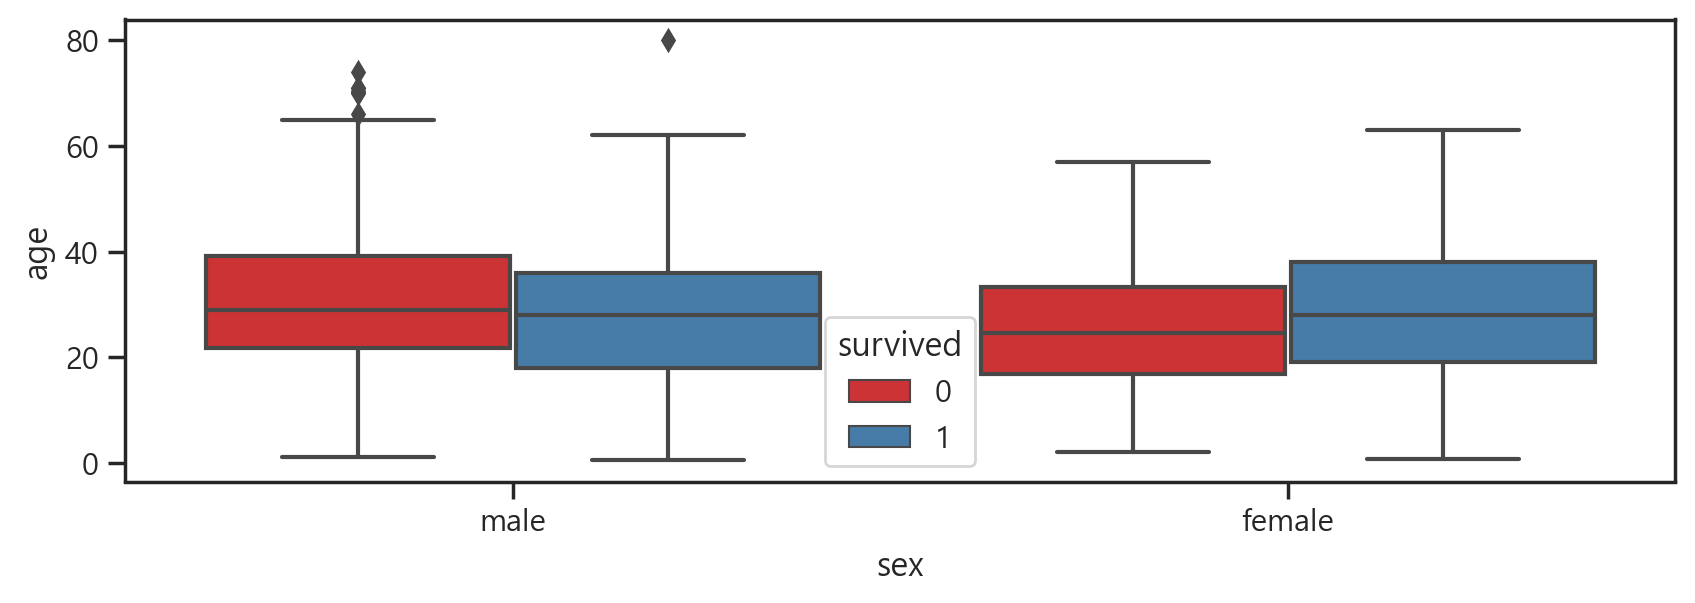

In [224]:
# boxplot
sns.boxplot(data=titanic,
               x='sex',
               y='age',
               hue='survived')
plt.show()

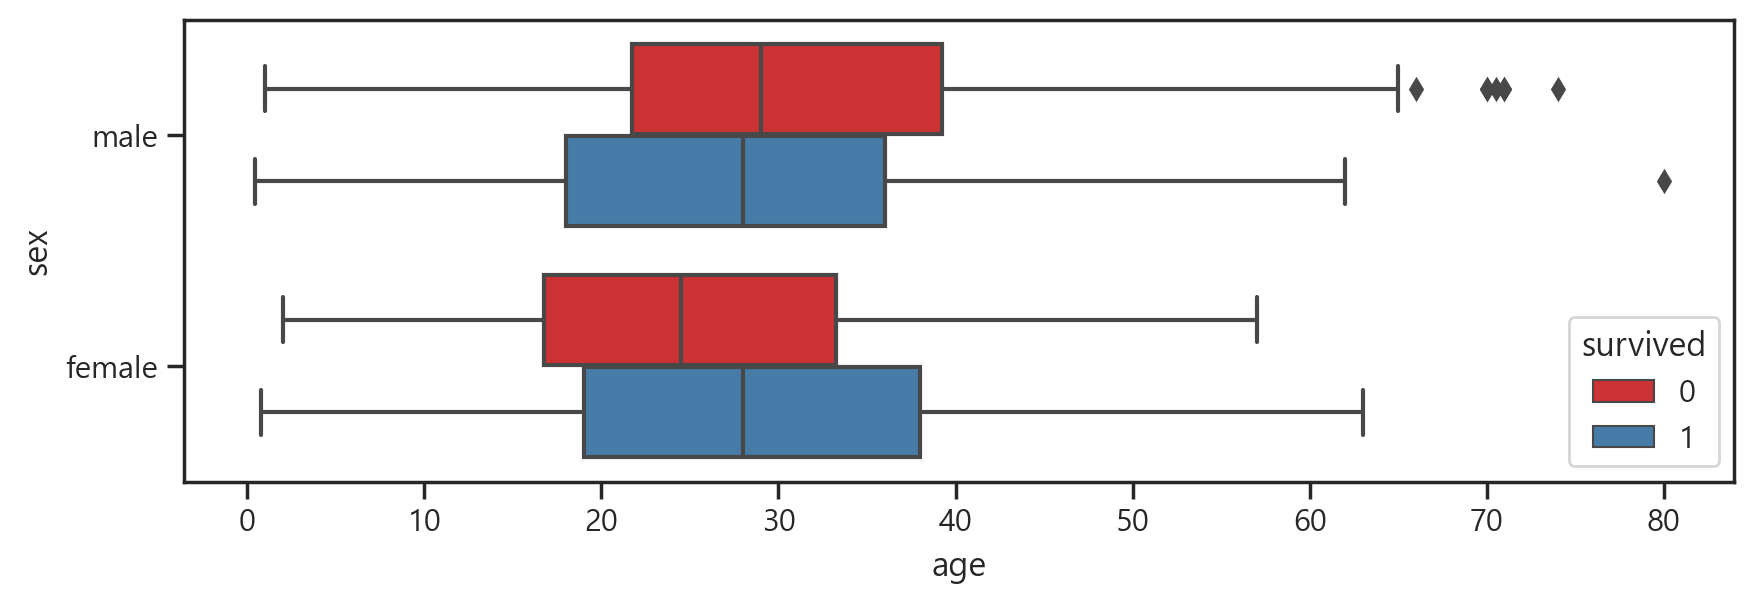

In [230]:
sns.boxplot(data=titanic,
               y='sex',
               x='age',
               hue='survived')
plt.show()

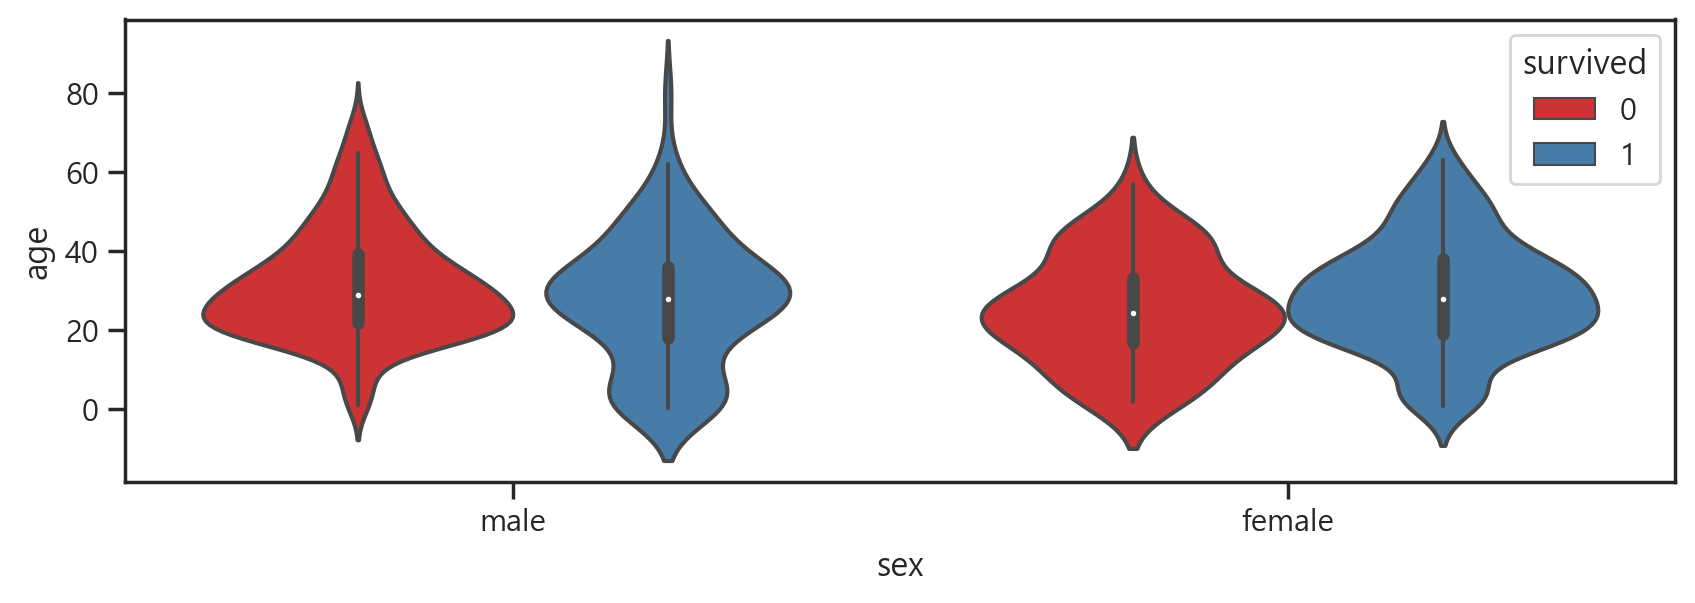

In [228]:
#violinplot
sns.violinplot(data=titanic,
               x='sex',
               y='age',
               hue='survived')
plt.show()

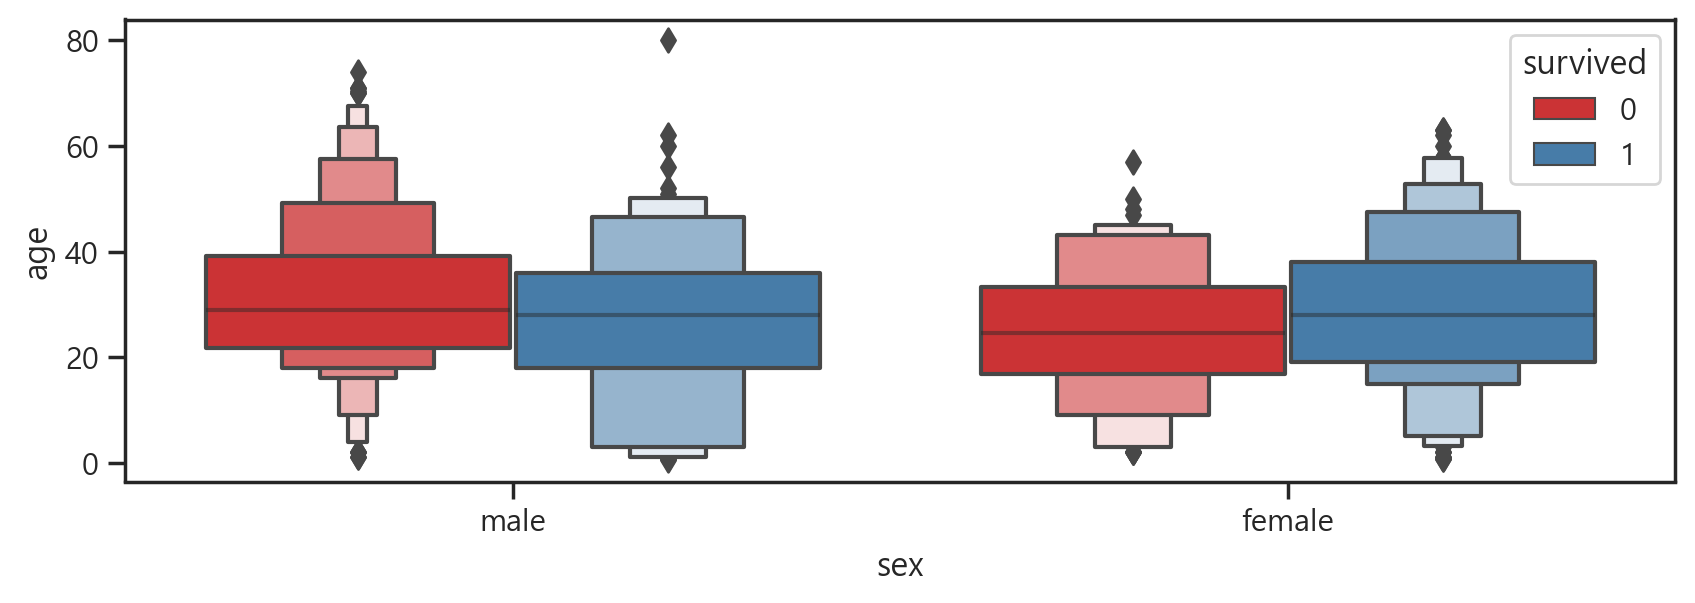

In [234]:
#boxenplot : box플롯 + 분포
sns.boxenplot(data=titanic,
               x='sex',
               y='age',
               hue='survived')
plt.show()

### 3)쌍관계 그래프
- pairplot : 데이터프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatter)와 히스토그램

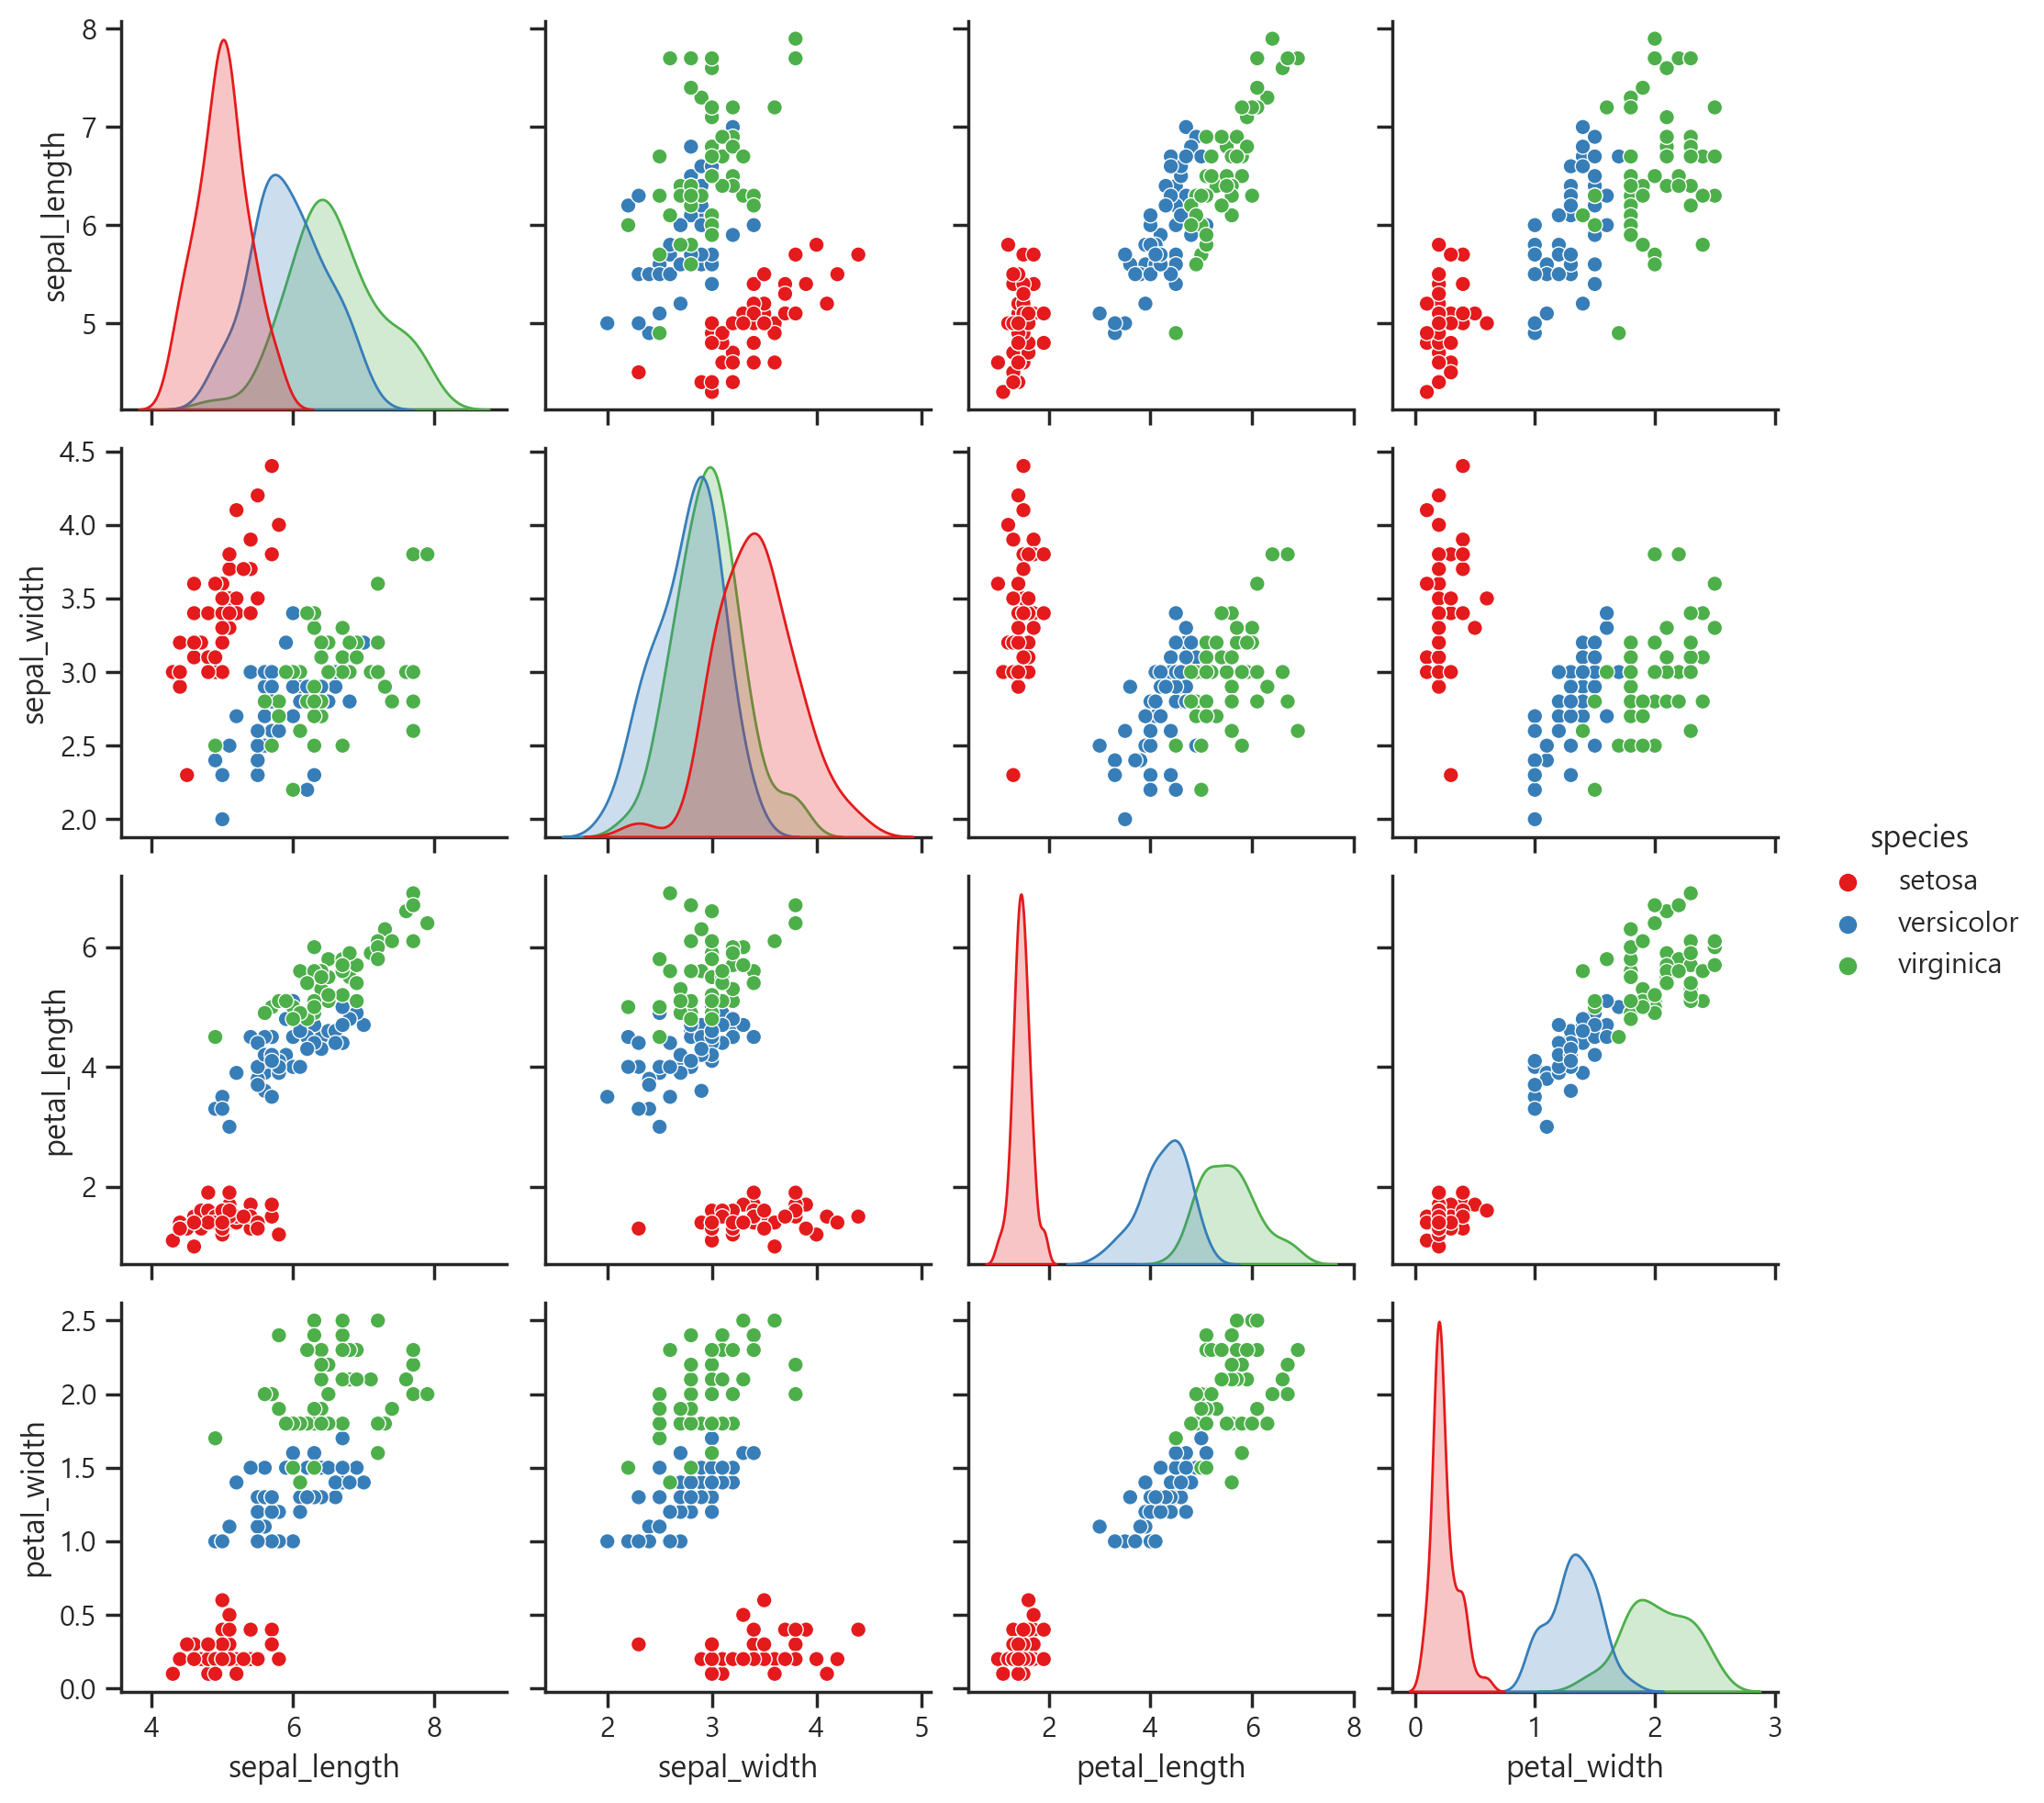

In [237]:
sns.pairplot(data=iris, hue='species' )
plt.show()

### 4)밀도 그래프  (histplot, displot) 
- x만 있고 y는 지정하면 안 됨

In [239]:
import numpy as np

In [240]:
x = np.random.randn(10000) #평균0, 표준편차1인 정규분포로 10000개 1차원 배열
x

array([-1.44357683, -0.24652622, -0.64919141, ..., -0.57859593,
       -0.53256024, -1.04725052])

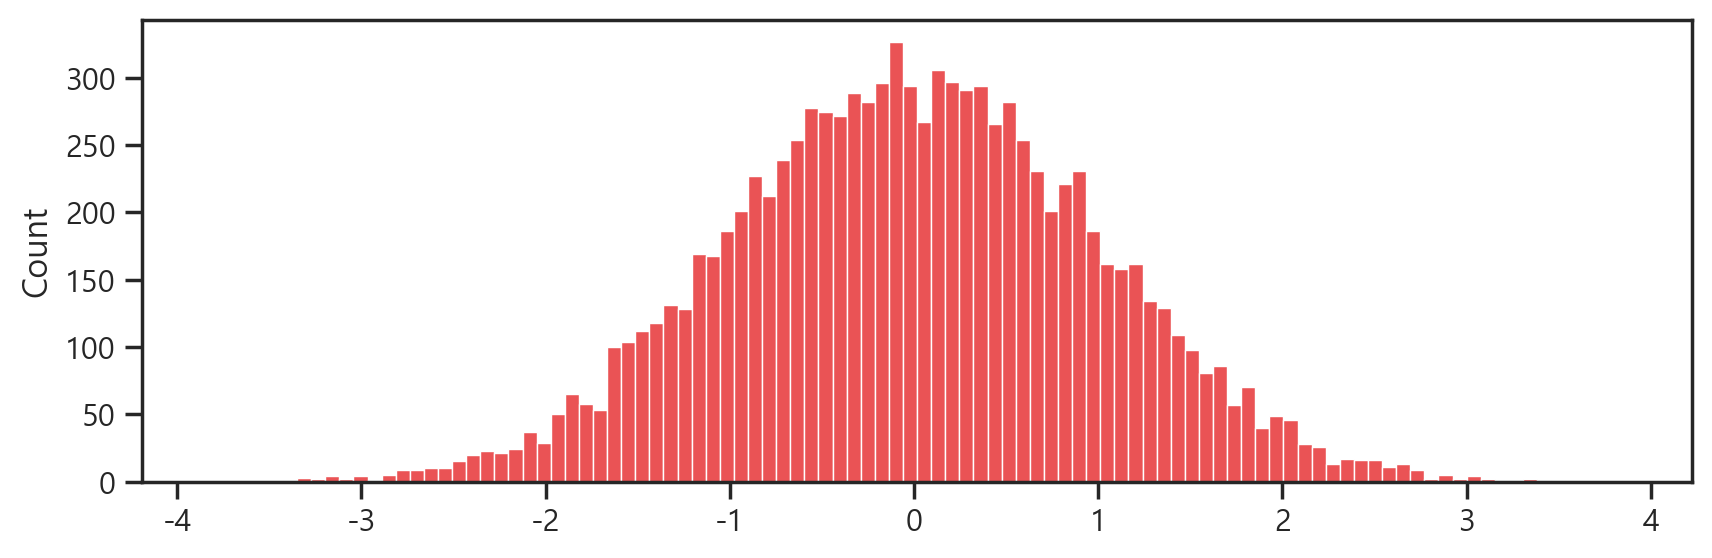

In [248]:
sns.histplot(x, bins=100, kde=False)
plt.show()

### 5)회귀 그래프

In [251]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


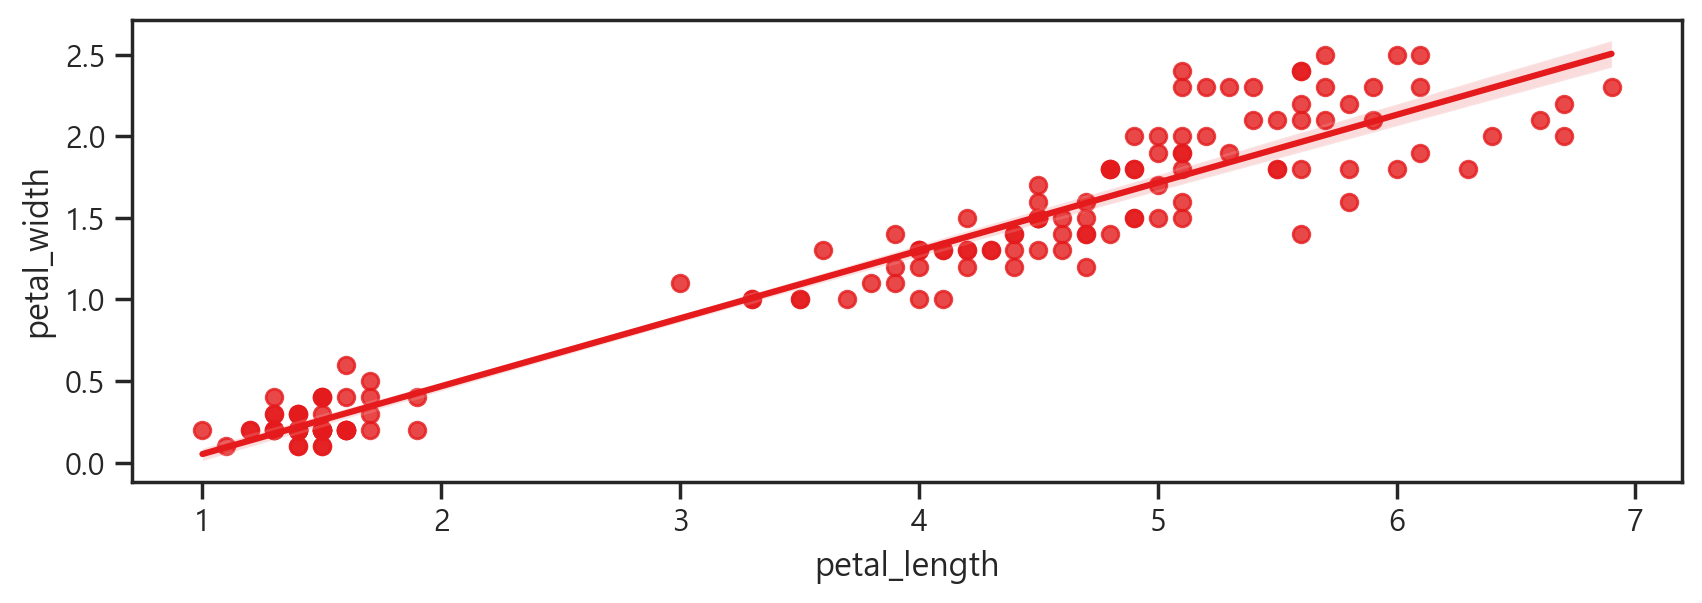

In [257]:
#회귀 그래프 : regplot (hue 사용 불가), lmplot(hue 사용가능)
sns.regplot(data=iris, x='petal_length', y='petal_width') #hue='species')
plt.show()

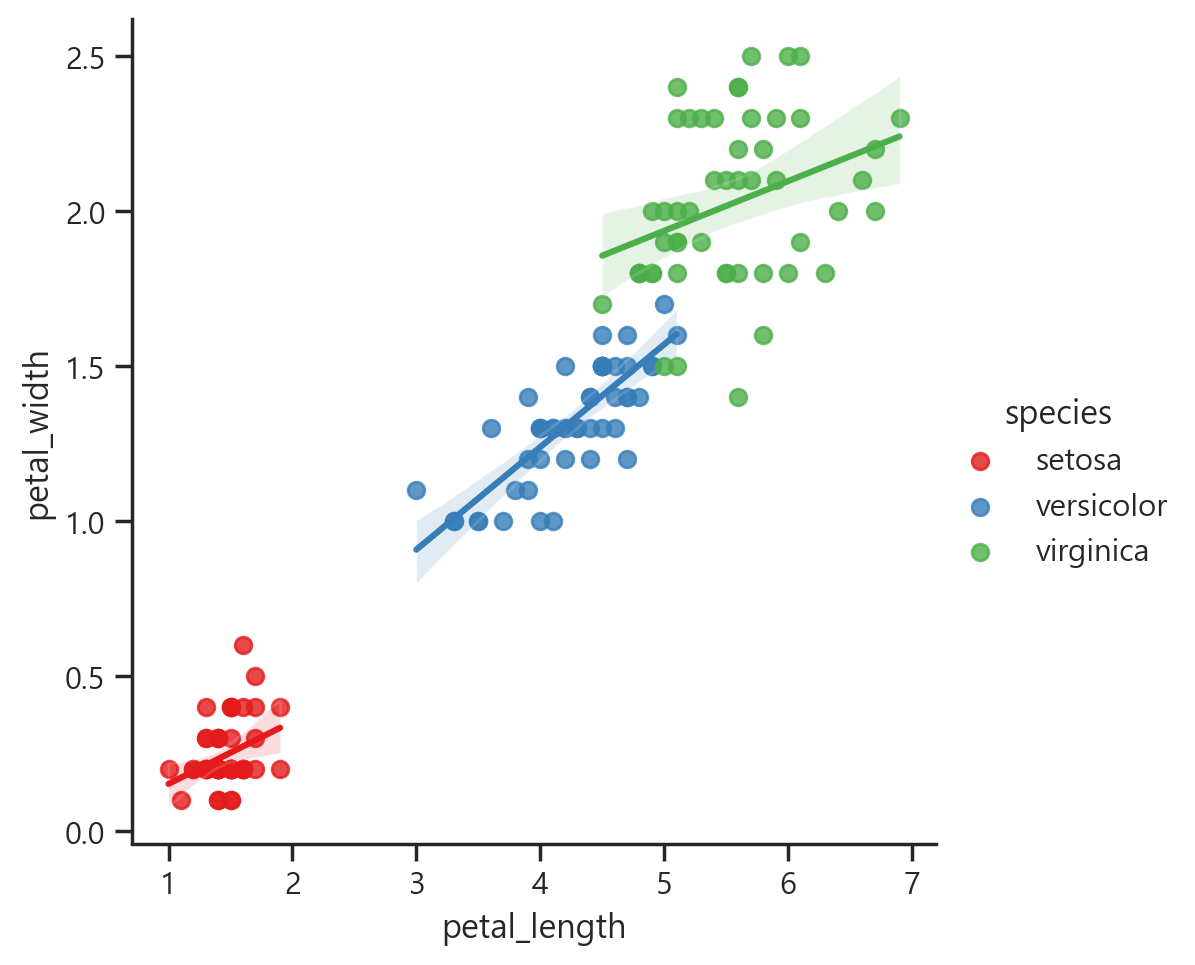

In [265]:
# 종별 회귀그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species')#, col='species')
plt.show()

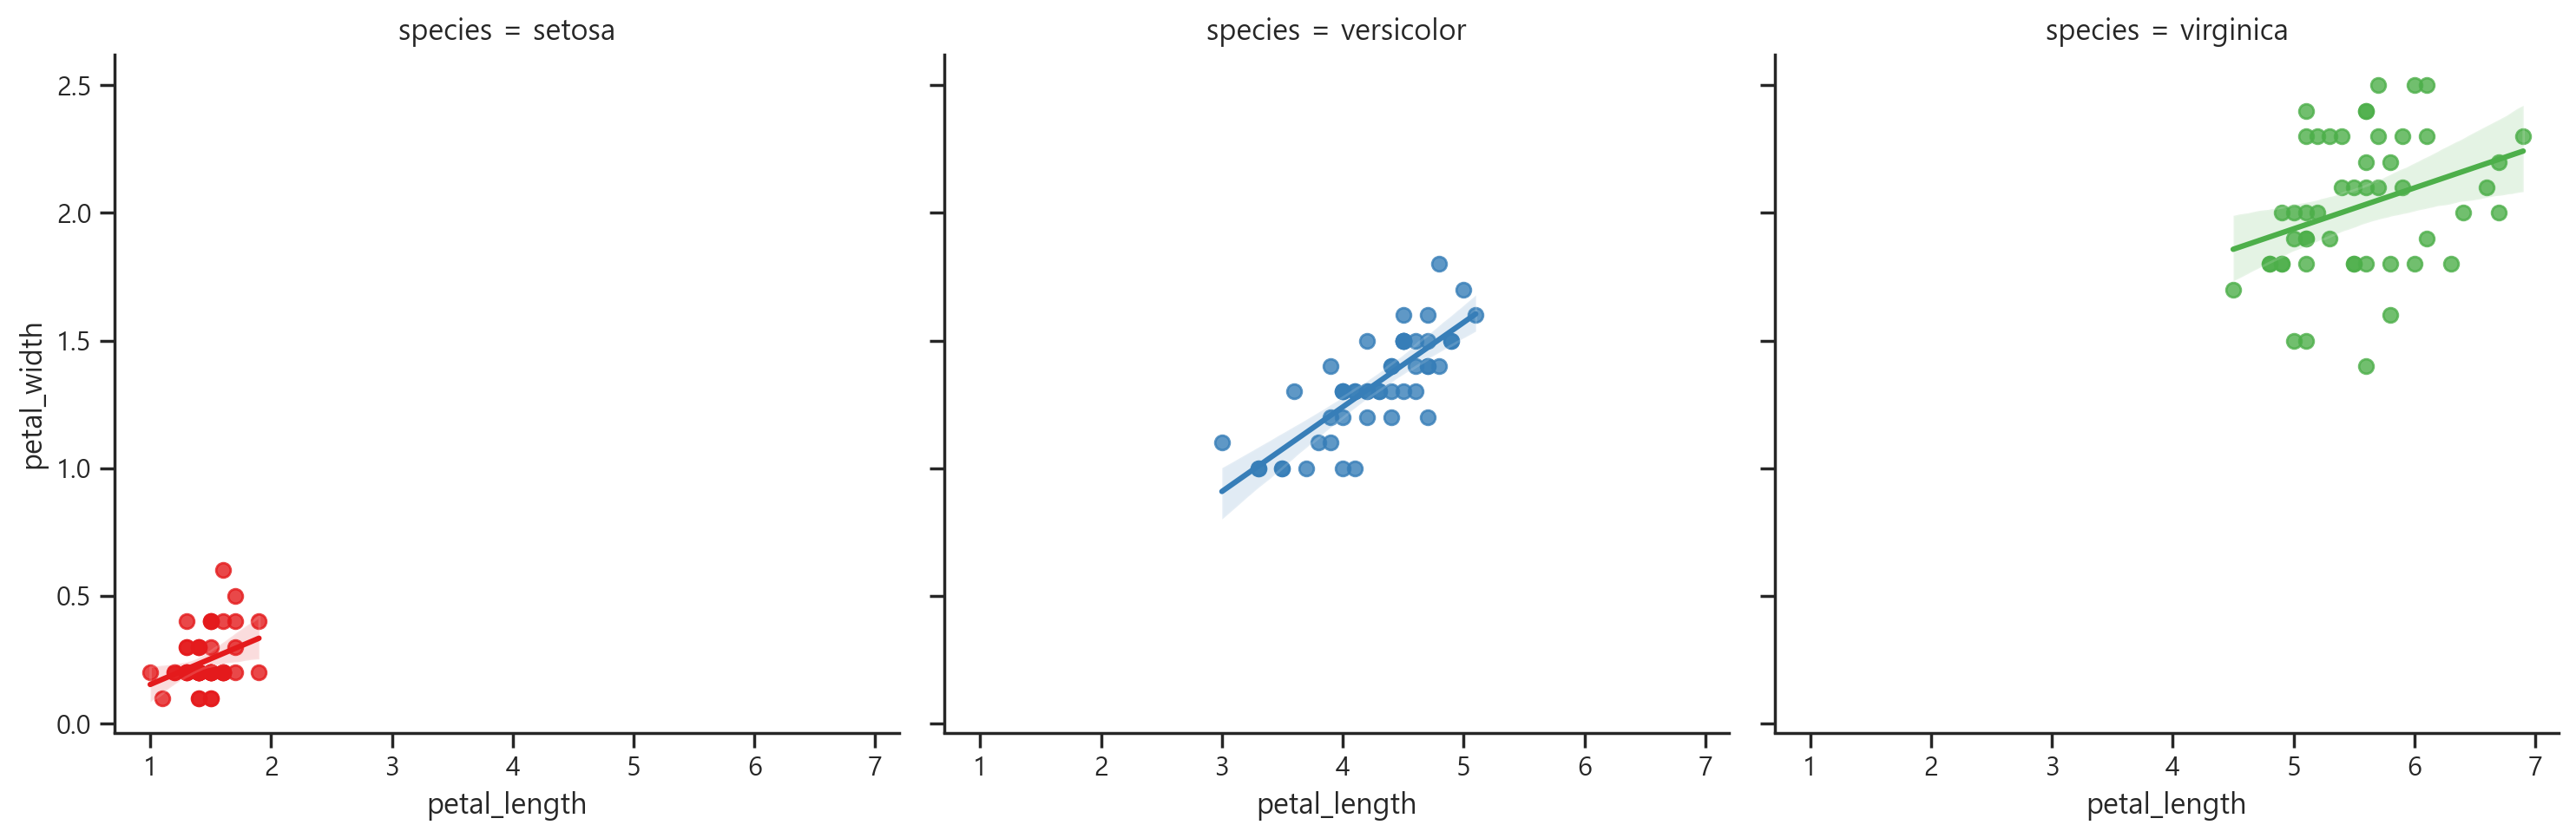

In [266]:
# 종별 회귀그래프_서브플롯
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species', col='species')
plt.show()

## 2.4 다중그래프를 위한 FacetGrid 
- https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples (교안 84page)

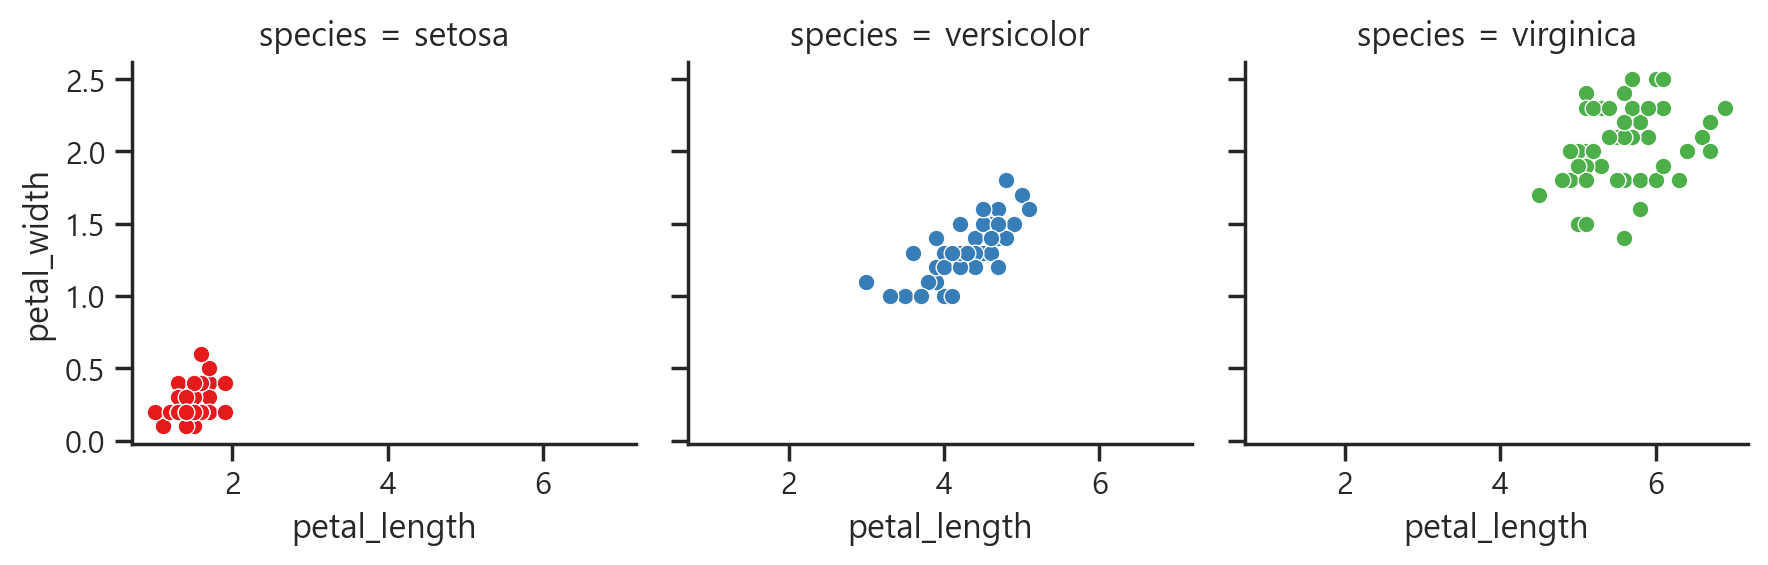

In [271]:
g = sns.FacetGrid(iris,col='species', hue='species')
g.map(sns.scatterplot, 'petal_length','petal_width') #x값 먼저, y값 작성
plt.show()

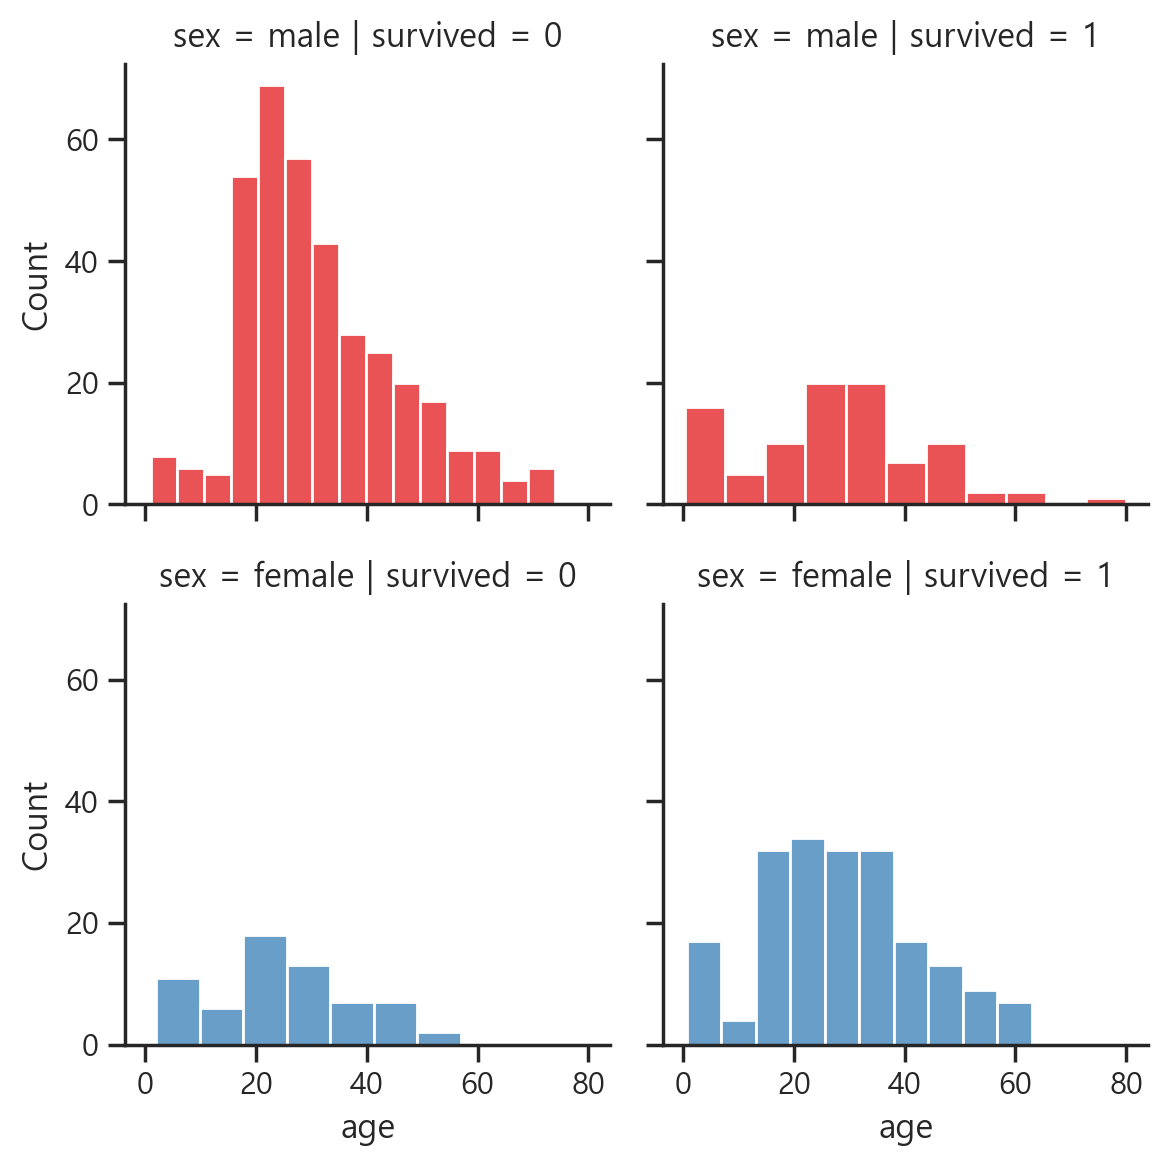

In [274]:
g = sns.FacetGrid(titanic,col='survived', hue='sex', row='sex')
g.map(sns.histplot, 'age') #x값 먼저, y값 작성
plt.show()